#**Kaggle contest**

**Course: Introduction to Machine learning (EE5180)**

**Team: Classifier**

Made by:

Krutik Malani (EE20B071)

Rahil Amit Shah (EE20B104)

Vivek Surwase (EE20B153)

##**Downloading the dataset**

This method is described at the https://www.kaggle.com/general/74235 

In [ ]:
!pip install -q kaggle

In [ ]:
# Upload kaggle.json file 

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahilamitshah","key":"5e714ce1c3e1f8811f9c409fd4b4a8e5"}'}

In [ ]:
# Make directory named kaggle and copy kaggle.json file there.

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:

!kaggle competitions download -c ee5180-course-contest

  0% 0.00/691k [00:00<?, ?B/s]
100% 691k/691k [00:00<00:00, 91.0MB/s]


In [ ]:
# unzip train and test data

! unzip ee5180-course-contest.zip -d train 

Archive:  ee5180-course-contest.zip
  inflating: train/Insurance_Test.csv  
  inflating: train/Insurance_Train.csv  
  inflating: train/sample_submission.csv  


In [ ]:
cd train

[Errno 2] No such file or directory: 'train'
/content/train


Importing the neccessary libraries

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

warnings.filterwarnings(action="ignore")


Reading the training and test data

In [ ]:
test_data = pd.read_csv('Insurance_Test.csv')
train_data = pd.read_csv('Insurance_Train.csv')

Just having a look over the data. We see that the training dataset has 15 variables and y being the output corresponding to each row

In [ ]:
train_data.head(5)

,id,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,98749,32,admin.,single,secondary,64,yes,no,unknown,may,202,2,-1,0,unknown,0
1,19550,45,blue-collar,married,secondary,534,no,no,cellular,aug,104,6,-1,0,unknown,0
2,75084,45,technician,married,secondary,1477,yes,no,cellular,nov,75,1,132,1,failure,0
3,65715,39,technician,married,tertiary,14,no,no,cellular,jan,114,2,-1,0,unknown,0
4,41412,49,blue-collar,single,unknown,2222,no,no,unknown,jun,114,2,-1,0,unknown,0


So, this is how our data looks like, basically it has 16 columns of data. Let's dive in to get better insights.

In [ ]:
train_data.describe()

,id,age,balance,duration,campaign,pdays,previous,y
count,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000
mean,54899.530438,40.944555,1362.242621,257.943744,2.764457,40.340141,0.582344,0.116985
std,25930.988287,10.625554,3044.786399,257.888397,3.100915,100.247601,2.340269,0.321406
min,10000.000000,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,32429.000000,33.000000,73.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,54845.000000,39.000000,450.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,77361.000000,48.000000,1430.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,99998.000000,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


The above gives statistical information of the numerical data types. Also, we get to know that we have 40,689 rows of data

In [ ]:
train_data.columns

Index(['id', 'age', 'job', 'marital', 'education', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

The above lists the columns in the data set

In [ ]:
x1 = train_data.copy()
t1 = test_data.copy()

##**Data visualization**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40689 entries, 0 to 40688
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         40689 non-null  int64 
 1   age        40689 non-null  int64 
 2   job        40689 non-null  object
 3   marital    40689 non-null  object
 4   education  40689 non-null  object
 5   balance    40689 non-null  int64 
 6   housing    40689 non-null  object
 7   loan       40689 non-null  object
 8   contact    40689 non-null  object
 9   month      40689 non-null  object
 10  duration   40689 non-null  int64 
 11  campaign   40689 non-null  int64 
 12  pdays      40689 non-null  int64 
 13  previous   40689 non-null  int64 
 14  poutcome   40689 non-null  object
 15  y          40689 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 5.0+ MB


Hence, we have 8 intger variables (including y), while 8 object variables

In [ ]:
train_data.describe()

,id,age,balance,duration,campaign,pdays,previous,y
count,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000
mean,54899.530438,40.944555,1362.242621,257.943744,2.764457,40.340141,0.582344,0.116985
std,25930.988287,10.625554,3044.786399,257.888397,3.100915,100.247601,2.340269,0.321406
min,10000.000000,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,32429.000000,33.000000,73.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,54845.000000,39.000000,450.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,77361.000000,48.000000,1430.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,99998.000000,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


We see that id is not a useful column for us and hence we drop the id column

The following are the observations that we make from this table


* The average age of the individuals in the dataset is 40.94 years.
* The average bank balance is 1362.24 units.
* The average call duration is 257.94 seconds.
* On average, each person was contacted 2.76 times during this campaign.
* The average number of days since the last contact with the person is 40.34 days.
* On average, the number of contacts made with the person before this campaign is 0.58 times.
* The overall proportion of positive responses (i.e., the target variable y) is 0.12, indicating a class imbalance.
* The minimum age of individuals in the dataset is 18, and the maximum age is 95.
* The minimum bank balance is -8019 units, indicating that some people may have negative balances.
* The maximum bank balance is 102127 units, indicating that there may be some high-net-worth individuals in the dataset.
* The maximum call duration is 4918 seconds, which is quite high and may be an outlier.
* The maximum value of the 'pdays' column is 871, which is quite high and may be an outlier.
* The maximum value of the 'previous' column is 275, which is quite high and may be an outlier.





In [ ]:
train_data.corr() # correlation

,id,age,balance,duration,campaign,pdays,previous,y
id,1.000000,-0.005121,0.006719,0.000328,0.006572,-0.001787,-0.000290,0.004187
age,-0.005121,1.000000,0.097617,-0.003090,0.003205,-0.022623,0.002877,0.026044
balance,0.006719,0.097617,1.000000,0.024491,-0.014454,0.004443,0.015815,0.056482
duration,0.000328,-0.003090,0.024491,1.000000,-0.085787,-0.001668,0.001801,0.394121
campaign,0.006572,0.003205,-0.014454,-0.085787,1.000000,-0.090160,-0.034131,-0.074147
pdays,-0.001787,-0.022623,0.004443,-0.001668,-0.090160,1.000000,0.450531,0.101076
previous,-0.000290,0.002877,0.015815,0.001801,-0.034131,0.450531,1.000000,0.089008
y,0.004187,0.026044,0.056482,0.394121,-0.074147,0.101076,0.089008,1.000000


In [ ]:
train_data.nunique() # unique values

id           40689
age             77
job             12
marital          3
education        4
balance       6919
housing          2
loan             2
contact          3
month           12
duration      1539
campaign        46
pdays          550
previous        40
poutcome         4
y                2
dtype: int64

The above shows number of uniques values in the data

In [ ]:
train_data = train_data.drop(['id'],axis=1) # drop id column
train_data

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,32,admin.,single,secondary,64,yes,no,unknown,may,202,2,-1,0,unknown,0
1,45,blue-collar,married,secondary,534,no,no,cellular,aug,104,6,-1,0,unknown,0
2,45,technician,married,secondary,1477,yes,no,cellular,nov,75,1,132,1,failure,0
3,39,technician,married,tertiary,14,no,no,cellular,jan,114,2,-1,0,unknown,0
4,49,blue-collar,single,unknown,2222,no,no,unknown,jun,114,2,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40684,29,technician,single,secondary,3313,yes,no,unknown,jun,18,3,-1,0,unknown,0
40685,59,admin.,married,secondary,92,yes,no,cellular,may,139,2,350,1,failure,0
40686,54,blue-collar,married,secondary,548,no,no,cellular,aug,520,7,-1,0,unknown,1
40687,46,blue-collar,married,primary,258,yes,no,unknown,may,217,1,-1,0,unknown,0


In [ ]:
# Select only the categorical columns
categorical_cols = train_data.select_dtypes(include=['object'])

# Describe the categorical columns
description = categorical_cols.describe()

In [ ]:
description 

,job,marital,education,housing,loan,contact,month,poutcome
count,40689,40689,40689,40689,40689,40689,40689,40689
unique,12,3,4,2,2,3,12,4
top,blue-collar,married,secondary,yes,no,cellular,may,unknown
freq,8749,24492,20869,22572,34164,26384,12357,33228


We get a bit of understanding about the unique labels in each column, and what are the highest occuring labels in the data

We find that may has unusually very high number of values. Also, there are 20 unique values which means that the people are working every month each year. This suggest the hardwork of the people

This was a short look over the data and understanding some general pattern. Not much could be infered from the above tables. Let's dive deeper

Let us now look over the patterns with y

####Variation of y over the data

<Axes: ylabel='y'>

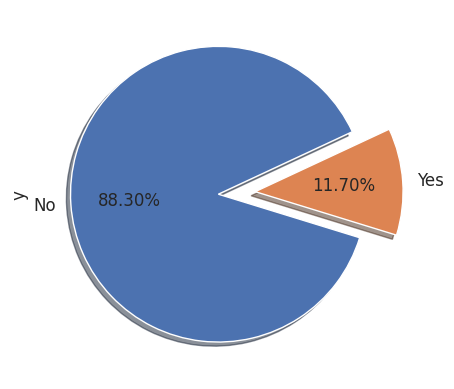

In [ ]:
labels = "No", "Yes"

train_data["y"].value_counts().plot.pie(
    explode=[0, 0.25],
    autopct="%1.2f%%",
    shadow=True,
    labels=labels,
    fontsize=12,
    startangle=25,
)

We see that 88.3% people have not subscribed to the term deposit. 

And this is how the insurance sector works the success rate will be very low. It all depends on how intelligently deal with data and find the best prospects so as to have a better and optimised performance. 

And therefore we are assigned to build a machine learning model over it to improve the success ratio (performance over the test data set).

###age vs y

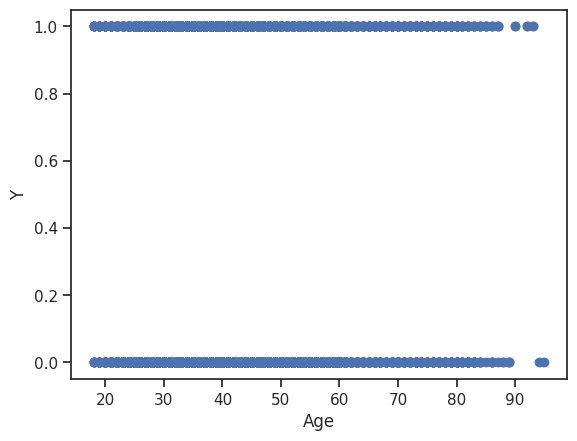

In [ ]:
# Plot age vs y using a scatter plot
plt.scatter(train_data['age'], train_data['y'])
plt.xlabel('Age')
plt.ylabel('Y')
plt.show()

Not much can be inferred from here let us continue. And that almost all the people have subscribed equally over the age group but we see a gap between in 90 to 95 age. These are the outliers, certainly as we know very few people live above the age of 90.

###job vs y

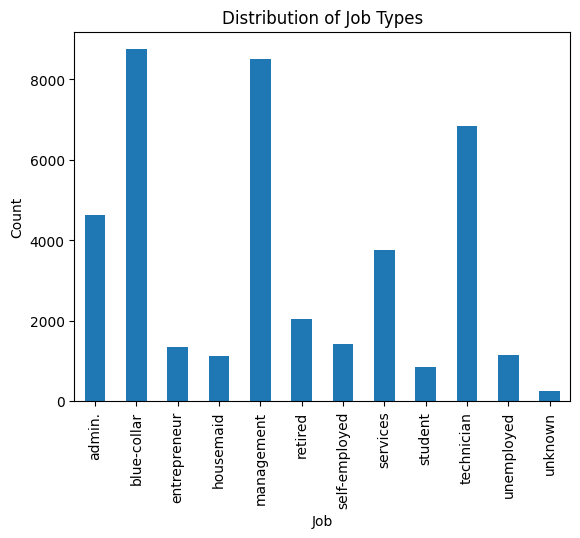

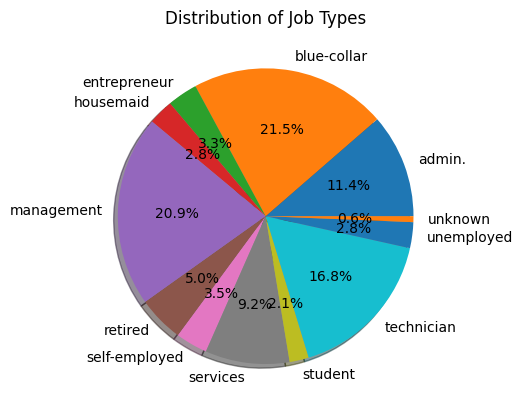

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot for the 'job' column in train_data
train_data.groupby('job').count()['y'].plot(kind='bar')
plt.title('Distribution of Job Types')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

# create a pie chart for the 'job' column in train_data with percentage values
train_data.groupby('job').count()['y'].plot(kind='pie',autopct='%1.1f%%',shadow = True)
plt.title('Distribution of Job Types')
plt.ylabel("")
plt.show()



We see that blue collar, management and technicians amount to most of the people. And certainly this is a really good strategy. This is because these are the people who have highly varied jobs. Some are superstars of their fields but some can barely manage living. And the blue collared workers have risky lives as they need to work in factories, construction. Certainly, we might expect a large number of insurances from them, so that they can have some sense of security.

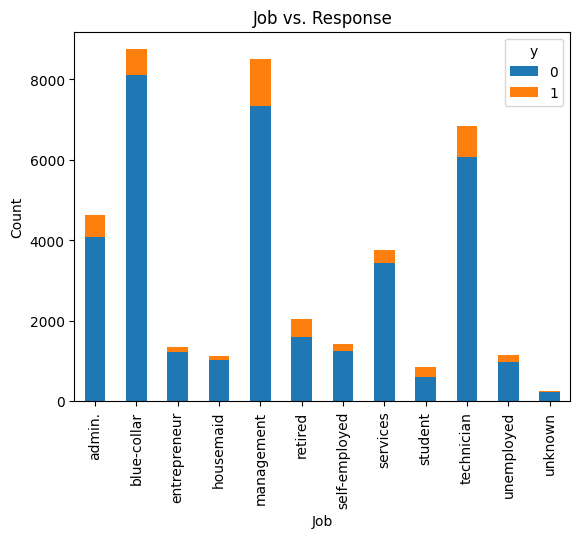

In [ ]:
import matplotlib.pyplot as plt

# group the data by job and response
job_response_counts = train_data.groupby(['job', 'y'])['y'].count().unstack()

# create a stacked bar plot of job and response
job_response_counts.plot(kind='bar', stacked=True)
plt.title('Job vs. Response')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()



Based on the bar plot of job types and their corresponding counts, we can infer that certain job types have a higher tendency to opt for insurance. Specifically, the job types of "blue-collar", "management", and "technician" have higher counts than other job types, indicating that individuals in these professions may have a greater need or preference for insurance products.

On the other hand, job types with lower counts such as "student", "housemaid", "entrepreneur", and "retired" may have a lower need or preference for insurance. This could be due to a variety of reasons, such as lower income levels, greater financial stability, or different priorities and life stages. A student might feel that an insurance is not required, an entrepreneur might feel that instead of paying for insurance I might want to invest in my own business. While housemaids have a pretty safe enviroment and they might feel that their life is quite less risky hence a less need for insurance.

Overall, this information could be useful for insurance companies to better understand their target audience and develop targeted marketing strategies.

####Marital status vs y

Let us see how many are married and how many are single and other over the data

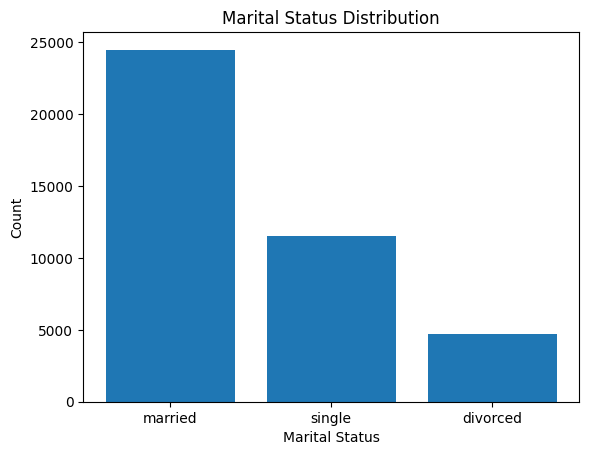

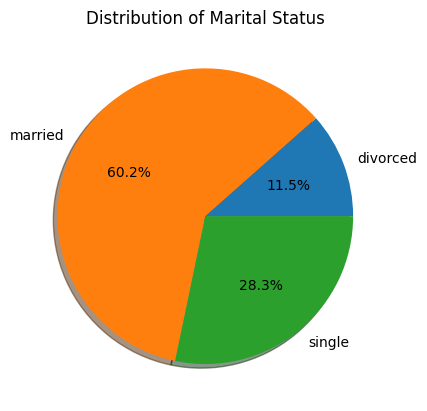

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot of marital status
marital_counts = train_data['marital'].value_counts()
plt.bar(marital_counts.index, marital_counts.values)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# pi chart of marital status
train_data.groupby('marital').count()['y'].plot(kind='pie',autopct='%1.1f%%',shadow = True)
plt.title('Distribution of Marital Status')
plt.ylabel("")
plt.show()

We see that there are a lot of married people in the dataset

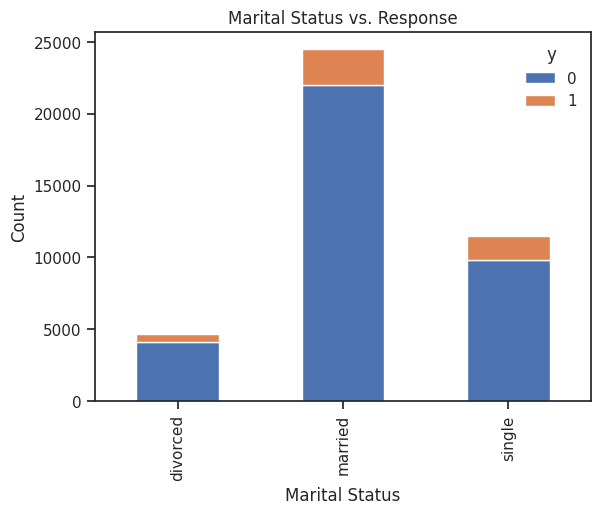

In [ ]:
import matplotlib.pyplot as plt

# group the data by marital status and response
marital_response_counts = train_data.groupby(['marital', 'y'])['y'].count().unstack()

# create a stacked bar plot of marital status and response
marital_response_counts.plot(kind='bar', stacked=True)
plt.title('Marital Status vs. Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


We see that married people are highly likely to opt for insurances and certainly it is so. This is because, most marital people will have children and wife to take care of and having an insurance for their own and their family will be great for all of them. In the difficult times this might help a lot. For example consider that a child may had an accident and the family suddenly needs 5 lakhs for operation at such times an insurance comes handy.

####Numeric data

let us understand how the numeric data varies over the data set. Of course kaggle has done a part for us expand over that.

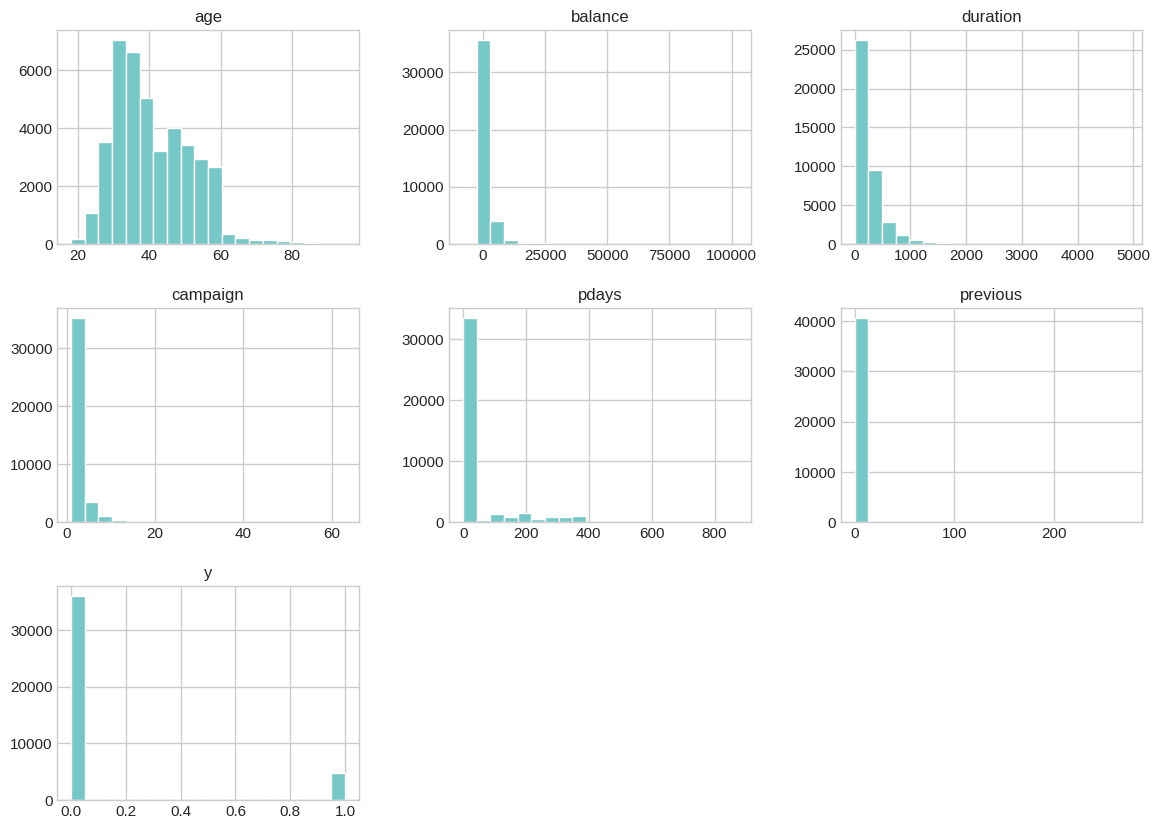

In [ ]:
plt.style.use("seaborn-whitegrid")

train_data.hist(bins=20, figsize=(14, 10), color="#76c8c8")
plt.show()

This gives the rough idea of the distribution of the data. We see that pdays, campagin and the previous is almost 0 all the data. This means the previous attempts to the clients have not been succesfull and in most cases there were no attempts made which implies previous to be 0.

In [ ]:
# making a class of colors for better visualization
class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"

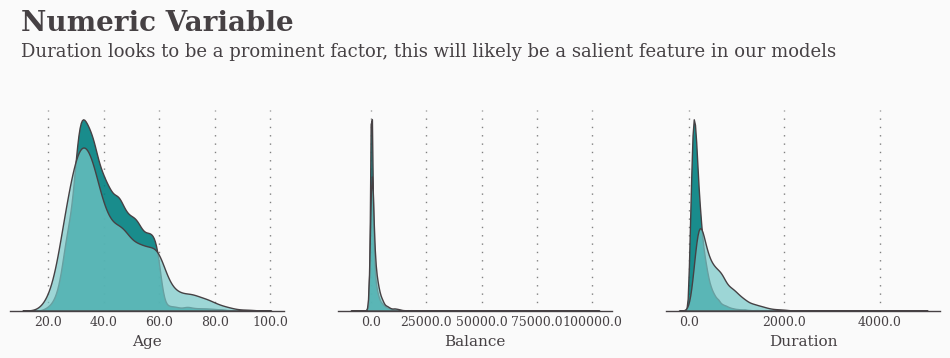

In [ ]:

# Plotting the distribution of the numerical features

no_subs = train_data.query("y==0") 
yes_subs = train_data.query("y == 1")

fig = plt.figure(figsize=(12, 12), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4, 3)


for ax, col in enumerate(range(0, 3)):
    locals()["ax" + str(ax)] = fig.add_subplot(gs[0, col])
    locals()["ax" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["ax" + str(ax)].tick_params(axis="y", left=False)
    locals()["ax" + str(ax)].tick_params(axis="x", color=Colors.DarkGray)
    locals()["ax" + str(ax)].get_yaxis().set_visible(False)
    locals()["ax" + str(ax)].grid(
        which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5)
    )
    for s in ["top", "right", "left"]:
        locals()["ax" + str(ax)].spines[s].set_visible(False)
        locals()["ax" + str(ax)].spines["bottom"].set_color(Colors.DarkGray)

col = ["age", "balance", "duration"]
for i, col in enumerate(col):
    sns.kdeplot(
        no_subs[col],
        ax=locals()["ax" + str(i)],
        shade=True,
        color=Colors.Teal,
        alpha=0.9,
        ec=Colors.DarkGray,
    )
    sns.kdeplot(
        yes_subs[col],
        ax=locals()["ax" + str(i)],
        shade=True,
        color=Colors.Aquamarine,
        alpha=0.7,
        ec=Colors.DarkGray,
    )
    locals()["ax" + str(i)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=11, color=Colors.DarkGray
    )
    locals()["ax" + str(i)].set_xticklabels(
        labels=locals()["ax" + str(i)].get_xticks().tolist(),
        fontfamily="serif",
        fontsize=9,
        color=Colors.DarkGray,
    )

ax0.text(
    10,
    0.065,
    "Numeric Variable",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)


ax0.text(
    10,
    0.059,
    "Duration looks to be a prominent factor, this will likely be a salient feature in our models",
    fontfamily="serif",
    fontsize=13,
    fontweight="normal",
    color=Colors.DarkGray,
)

fig.show()


Over here the light blue type region shows the people who have subsribed while and the darker is the ones who have not. Certainly we see that duration proves to be one of the important factors. As there is a clear boundary. As the duration of conversation increases, the prospect tends to subscribe for the insurance

In [ ]:
X = train_data.copy()   
X = X.drop('y',axis=1)

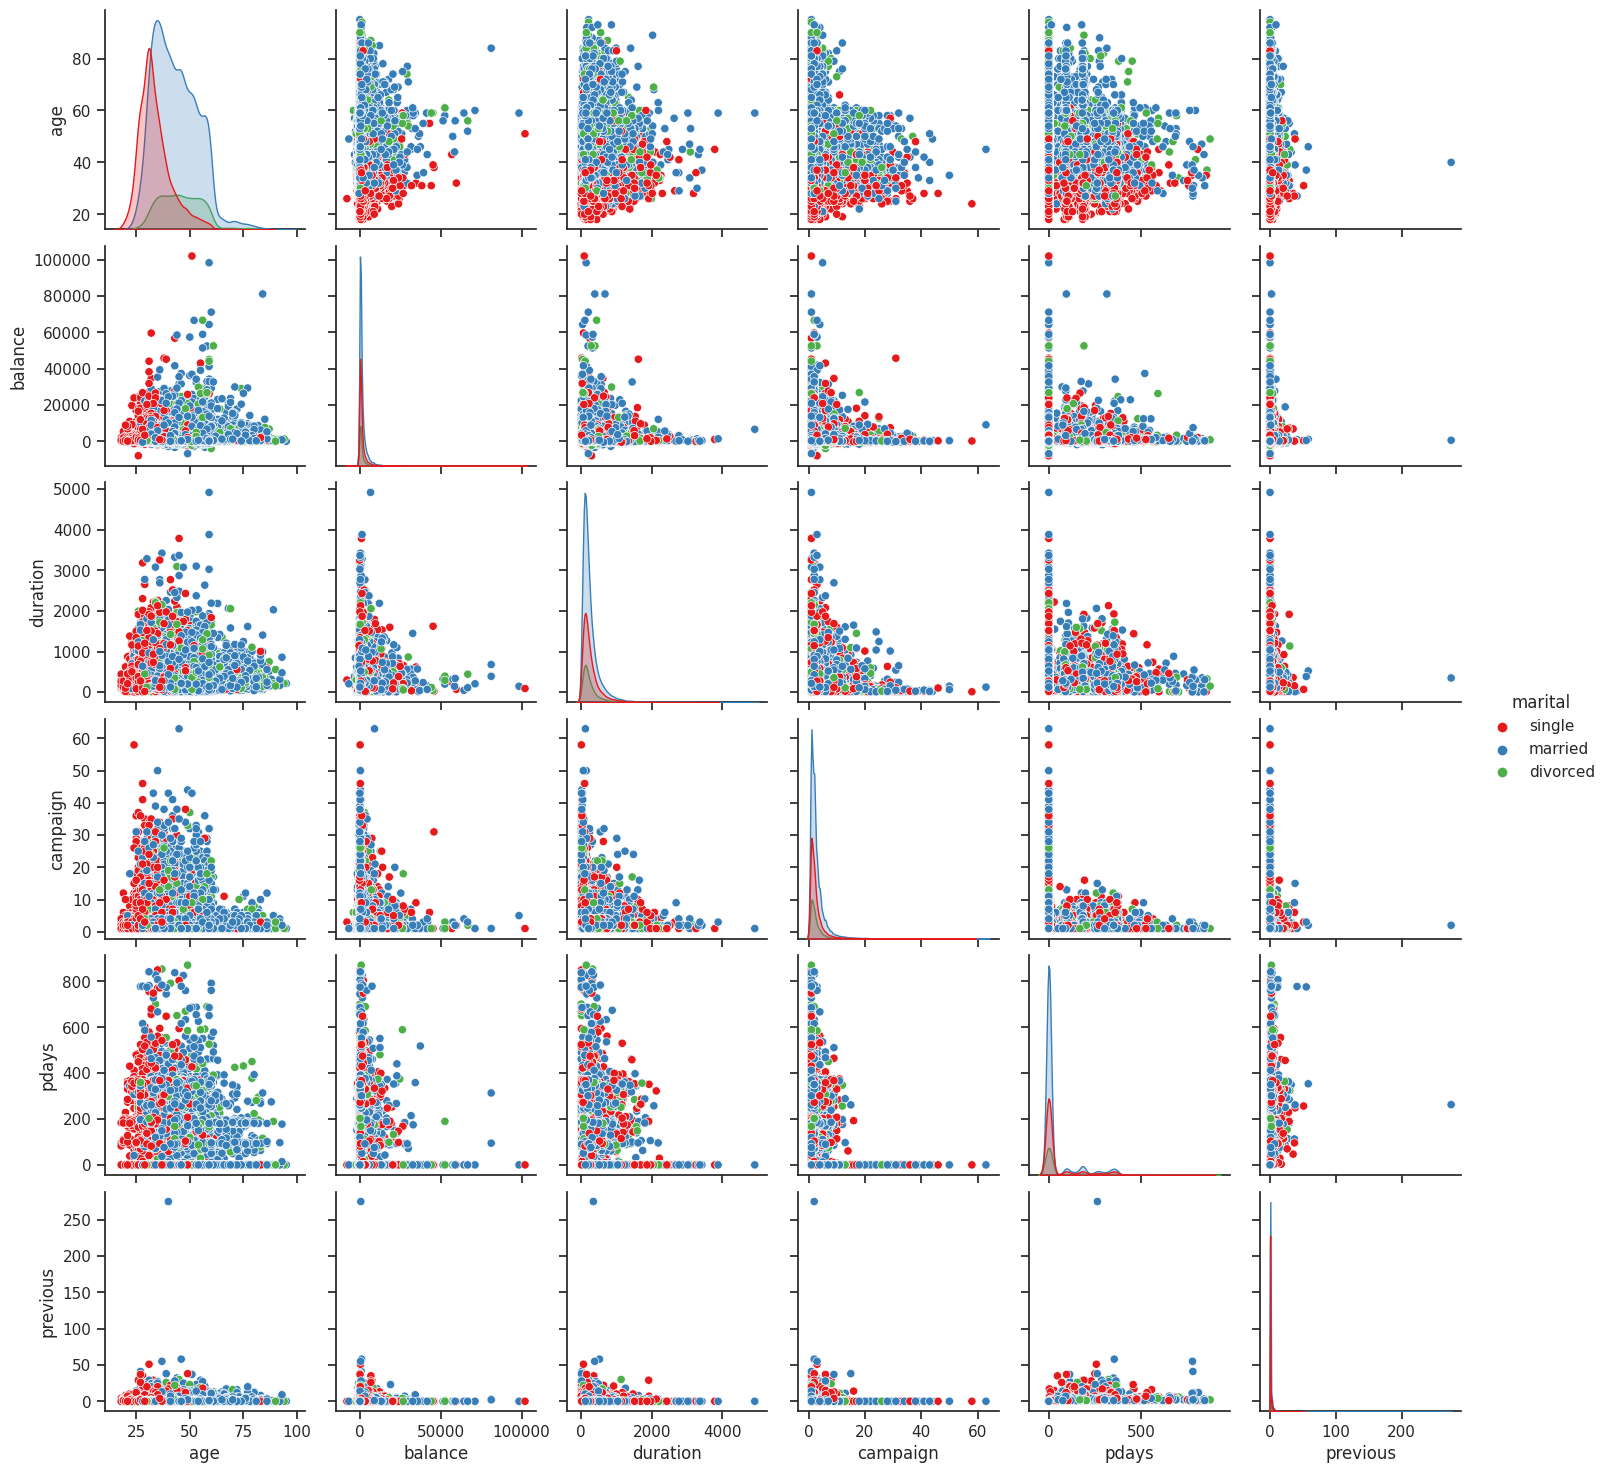

In [ ]:
sns.set(style="ticks")
sns.pairplot(X, hue="marital", palette="Set1")
plt.show()


Clearly we could see some outliers over here, as some points are lying way off the distributions. Hence, they would be needed to be handled seprately

Also, we see there is a huge number of population who is above 20 and married.This is true in real life as well we will see mostly people above 25 to 30 years of age are married. 


Also, the age plot for married is very big and is widely distributed indicating a lot of married people in the data set as we saw in one of the previous charts.

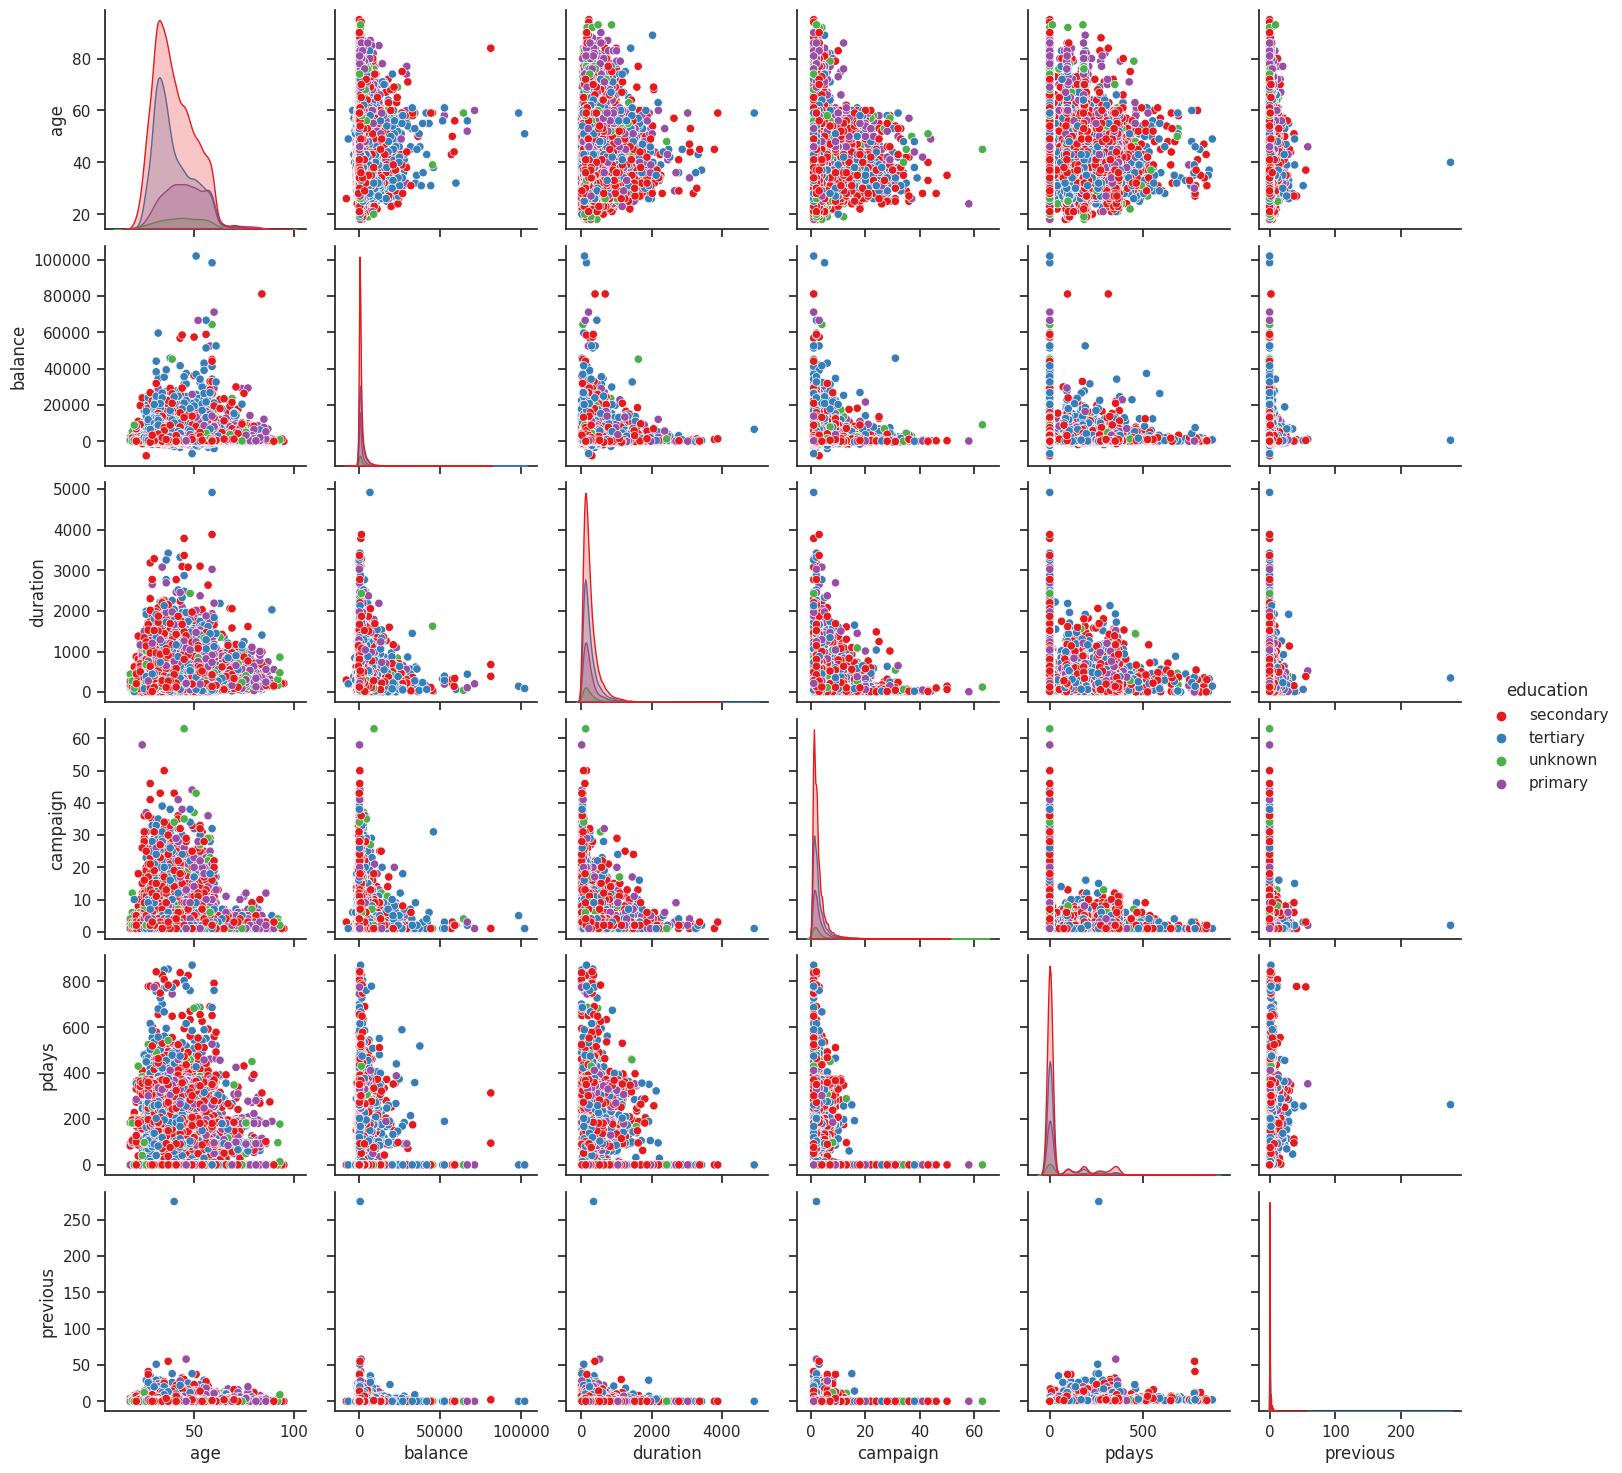

In [ ]:
sns.pairplot(X, hue="education", palette="Set1")
plt.show()

We see that there is a majority of people with secondary education. This is true in practical life as well. As most people today will complete atleast their secondary education. Also, we see that the mean of the tertiay education with age is shifted a bit towards a higher side. This is true in real life as well this is because most people pursuing tertiary education will graduate at a bit higher age as compared to others

The inference that can be made from the fact that some people with tertiary education have the highest bank balance is that there is a positive correlation between education level and bank balance. This could be due to the fact that people with higher education tend to have higher paying jobs, and thus have more disposable income to save or invest. Additionally, individuals with higher education levels may be more financially literate and make more informed investment decisions, leading to higher returns on their savings.

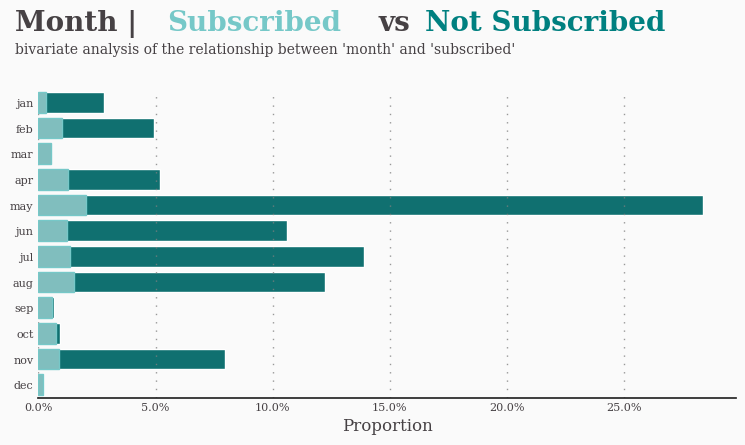

In [ ]:
import matplotlib.ticker as mtick

z = train_data.copy()
data = z.groupby(['month','y']).size().to_frame(name="count").reset_index()
data["percentage"] = data["count"].apply(lambda x: x / sum(data["count"]) * 100)
lst = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun",
    "jul",
    "aug",
    "sep",
    "oct",
    "nov",
    "dec",
]

month = data
no_subs = month.query("y==0").set_index("month").loc[lst].reset_index()
yes_subs = month.query("y==1").set_index("month").loc[lst].reset_index()

fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.grid(
    which="major",
    axis="x",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
for x in ["top", "left", "right"]:
    ax0.spines[x].set_visible(False)

sns.barplot(
    x="percentage", y="month", data=no_subs, color=Colors.Teal, ax=ax0, zorder=0
)
sns.barplot(
    x="percentage",
    y="month",
    data=yes_subs,
    color=Colors.Aquamarine,
    ax=ax0,
    ec=Colors.Aquamarine,
)

ax0.xaxis.set_major_formatter(mtick.PercentFormatter())
ax0.xaxis.set_major_locator(mtick.MultipleLocator(5))
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("Proportion", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_ylabel("")

ax0.text(
    -1,
    -2.8,
    "Month |",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)
ax0.text(
    5.5,
    -2.8,
    "Subscribed",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.Aquamarine,
)
ax0.text(
    14.5,
    -2.8,
    "vs",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)
ax0.text(
    16.5,
    -2.8,
    "Not Subscribed",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.Teal,
)

ax0.text(
    -1,
    -1.9,
    "bivariate analysis of the relationship between 'month' and 'subscribed'",
    fontfamily="serif",
    fontsize=10,
    fontweight="normal",
    color=Colors.DarkGray,
)

fig.show()


Based on the bivariate analysis of the relationship between "month" and "subscribed", we can infer that there is a higher proportion of subscribers in the month of May compared to other months. Additionally, there is a higher number of contacts made in May, which suggests that the marketing team may have targeted this month to promote the insurance scheme.

Therefore, we can conclude that the month of May could be a potentially important time period for the marketing team to focus their efforts on promoting the insurance scheme, as it seems to have been successful in terms of generating interest and subscriptions.

Based on this observation, a strategy can be devised to increase the number of contacts made during the months of March and September, as these months have a high success rate of conversion. This could potentially lead to more people subscribing to the insurance product. Additionally, since May has the highest number of contacts made, it may be worthwhile to analyze why this is the case and try to replicate this success in other months as well. Overall, these insights can help in designing a targeted and effective marketing strategy for the insurance product.

Understanding these seasonal trends can help inform a more targeted and effective strategy for contacting potential customers. By focusing outreach efforts during the months with historically high subscription rates and tailoring messaging and offers to capitalize on seasonal trends and motivations, a company can potentially increase their conversion rates and improve overall business performance.

**Plotting the correleation matrix for the data**

In [ ]:
z = train_data.copy()

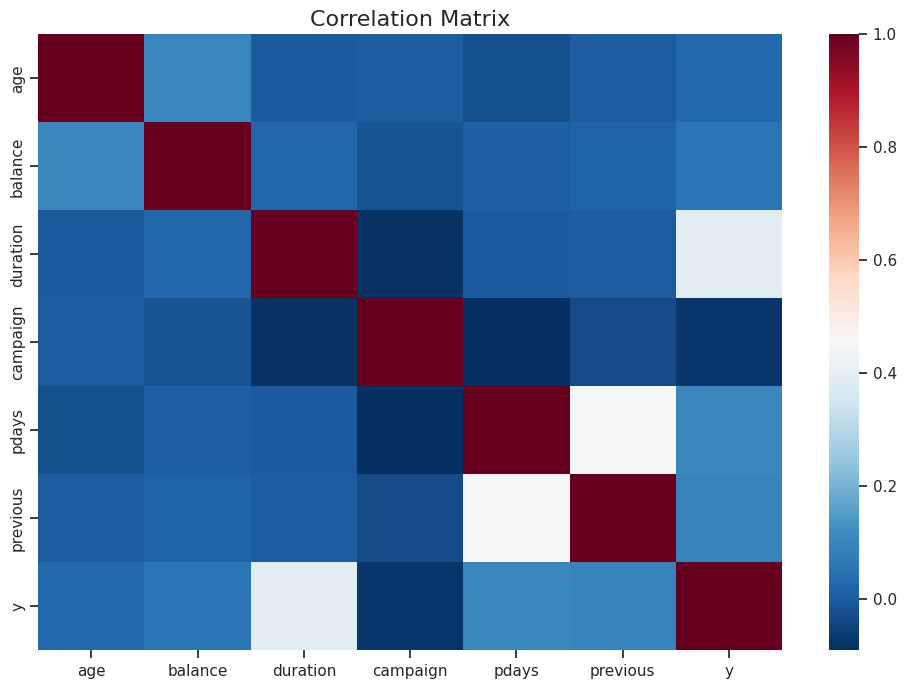

In [ ]:
from sklearn.preprocessing import LabelEncoder

fig = plt.figure(figsize=(12, 8))
z["y"] = LabelEncoder().fit_transform(z["y"])

numeric_df = z.select_dtypes(exclude="object")
corr_numeric = numeric_df.corr()

sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()


We see from the above covariance matrix that campaign seems to be not a very useful feature. As it's correleation with y is almost 0. While duration has the highest correleation with y. Hence, it might be very useful for the model.

The strong correlation between pdays and previous suggests that customers who have been contacted by the bank in the past are more likely to be contacted again, which makes sense in the real world. If a customer has shown interest or engagement with the bank's products or services in the past, the bank may prioritize contacting them again in the future. This correlation can help the bank target their marketing efforts more effectively, by focusing on customers who have shown previous interest in their products or services.

In [ ]:
data = z.groupby(['y']).size().to_frame(name="count").reset_index()
data["percentage"] = data["count"].apply(lambda x: x / sum(data["count"]) * 100)

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 58.6 MB/s eta 0:00:00


In [ ]:
len(yes_subs)

12

Only 4760 subscribed for the insurance

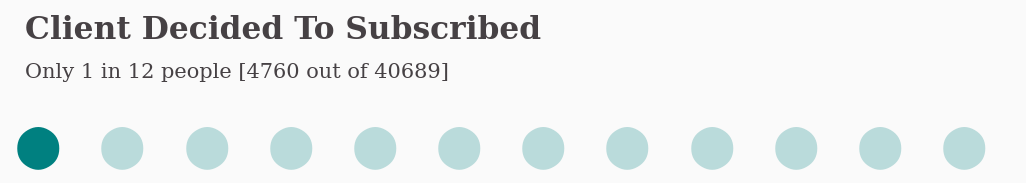

In [ ]:
subs = data
subs = subs.sort_index()
from pywaffle import Waffle

fig = plt.figure(
    figsize=(7, 2),
    dpi=150,
    facecolor=Colors.LightGray,
    FigureClass=Waffle,
    rows=1,
    values=[1, 11],
    colors=[Colors.Teal, Colors.LightCyan],
    characters="⬤",
    font_size=20,
    vertical=True,
)

fig.text(
    0.035,
    0.78,
    "Client Decided To Subscribed",
    fontfamily="serif",
    fontsize=15,
    fontweight="bold",
    color=Colors.DarkGray,
)
fig.text(
    0.035,
    0.65,
    f"Only 1 in 12 people [4760 out of {len(z)}]",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)

fig.show()

One possible real-world inference for why very few people subscribe to insurance could be the lack of awareness and education about the benefits of insurance. Many people may not fully understand how insurance works and how it can protect them from financial risks in the future. This could lead to a reluctance to pay for something that they don't fully understand or see the value in. Additionally, some people may not have the financial means to afford insurance premiums or may prioritize other expenses over insurance. Finally, some people may simply have a general distrust of insurance companies or be skeptical about their ability to provide adequate coverage.

Also, people might also have been enrolled in some another insurance as well hence, they might not want to enroll again in any another company.

##**Solving the missing value problem**

replacing the missing values with the mean

In [ ]:
# Number of missing values in each column of training data
missing_val_count_by_column = (train_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


Hence, we find that there is no null value in the data. Hence there is not an issue of missing value here

## **Handling Outliers**

In [ ]:
X = train_data

Outliers will be checked for all numerical columns.

<Axes: >

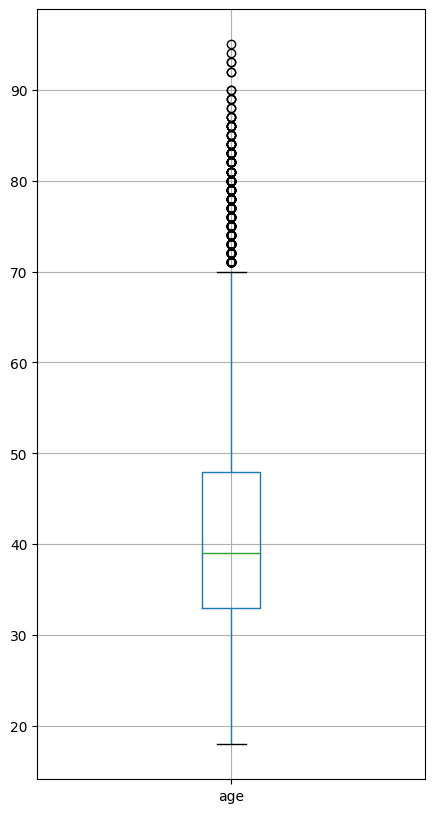

In [ ]:
age_df = pd.DataFrame(X["age"])
age_df.boxplot(figsize=(5,10))

Clearly we see that **age** column does not have any outlier as the ages are evenly distributed over the data and no one single data point is too off.

<Axes: >

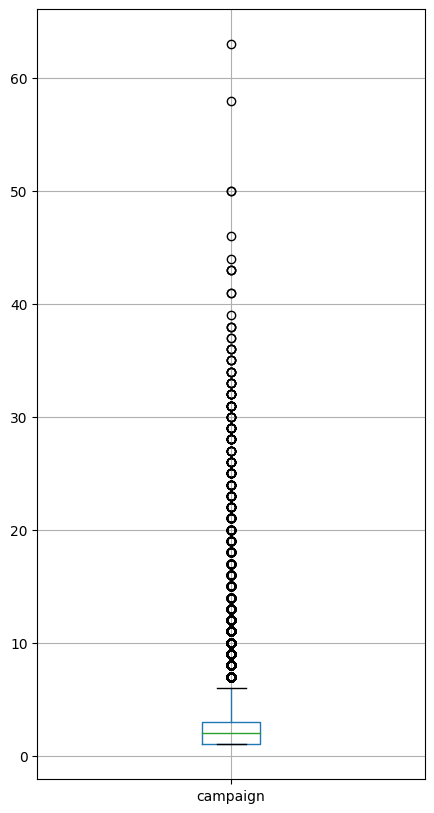

In [ ]:
campaign_df = pd.DataFrame(X["campaign"])
campaign_df.boxplot(figsize=(5,10))

In [ ]:
#count how may reocrds that have value of the campaign greater than 50
X[X['campaign'] > 50].shape[0]

2

There are 2 outliers which will be removed in the next step

Before Shape: (40689, 16)
After Shape: (40685, 16)


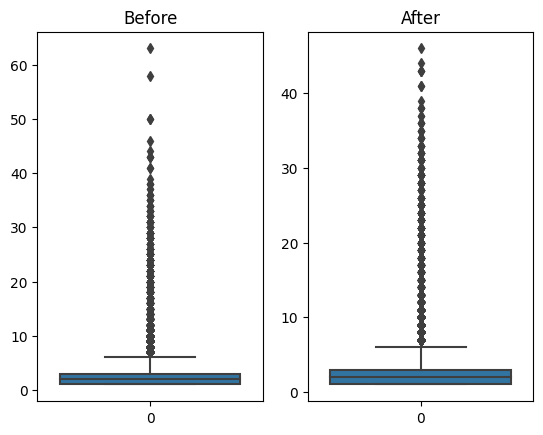

In [ ]:
fig, axes = plt.subplots(1,2)

print("Before Shape:", X.shape)
#remove outliers that is more than 50
X_df =X[X['campaign']<50]
print("After Shape:", X_df.shape)

sns.boxplot(X['campaign'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(X_df['campaign'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

X=X_df;
X=X.reset_index(drop=True)

Clearly our data now looks much more uniform than before

<Axes: >

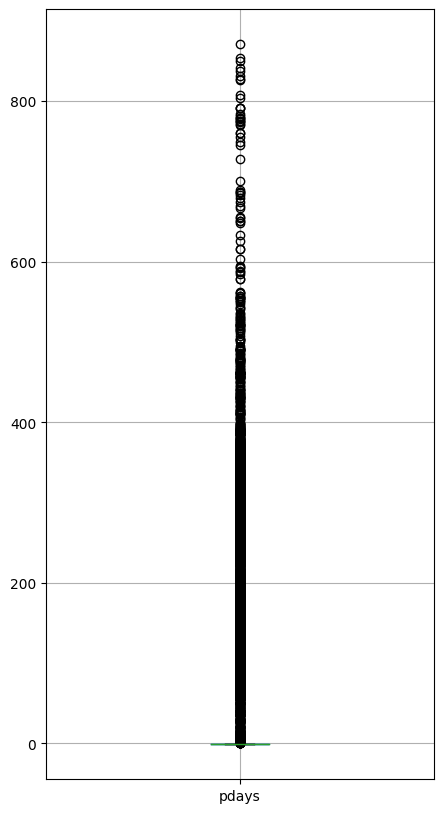

In [ ]:
pdays_df = pd.DataFrame(X["pdays"])
pdays_df.boxplot(figsize=(5,10))

The data does not seem to have any outliers for pdays. Hence, we continue our analysis without dropping any data points here.

<Axes: >

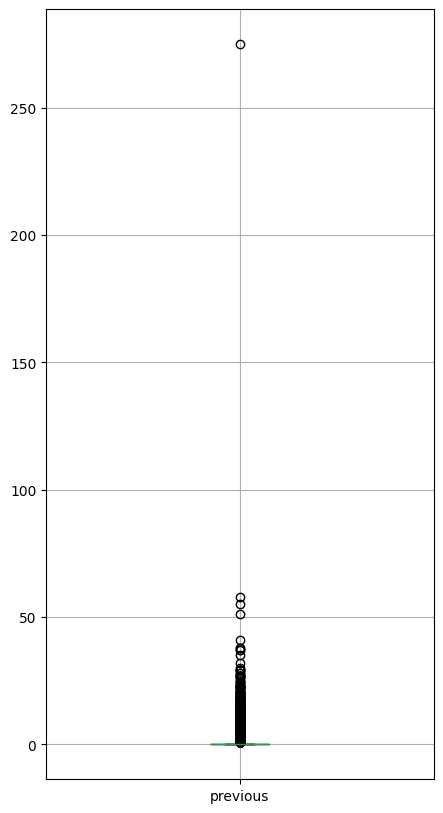

In [ ]:
previous_df = pd.DataFrame(X["previous"])
previous_df.boxplot(figsize=(5,10))

In [ ]:
X[X['previous'] > 250].shape[0]

1

There is only one outlier and it is dropped in the next step.

Before Shape: (40685, 16)
After Shape: (40684, 16)


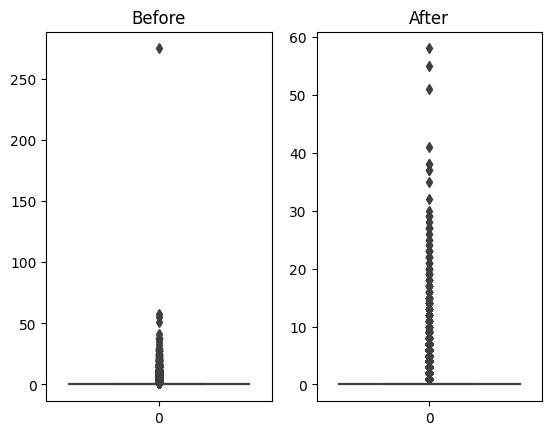

In [ ]:
fig, axes = plt.subplots(1,2)

print("Before Shape:", X.shape)
X_df =X[X['previous']<250]
print("After Shape:", X_df.shape)

sns.boxplot(X['previous'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(X_df['previous'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

X=X_df;
X=X.reset_index(drop=True)

Hence, we get a quite better distruibution of data after removing the outliers

<Axes: >

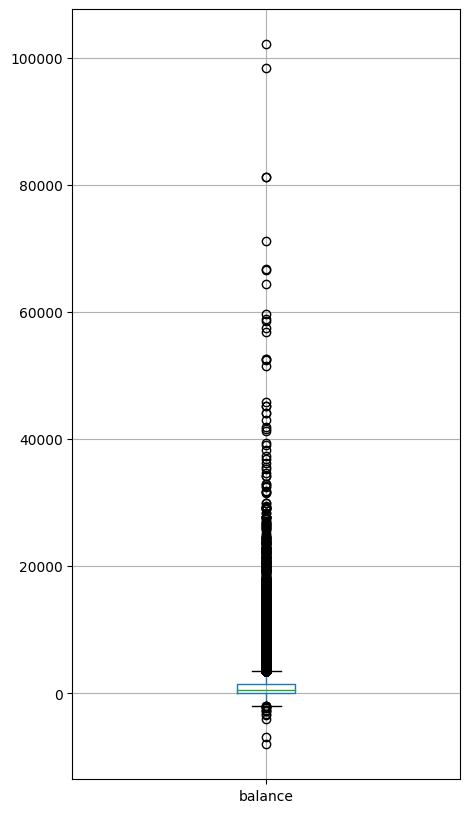

In [ ]:
balance_df = pd.DataFrame(X["balance"])
balance_df.boxplot(figsize=(5,10))

In [ ]:
X[X['balance'] > 90000].shape[0]

2

We see that there are 2 outliers here who have a very large balance that is greater than 90000. Hence, we would like to remove these as well

Before Shape: (40684, 16)
After Shape: (40682, 16)


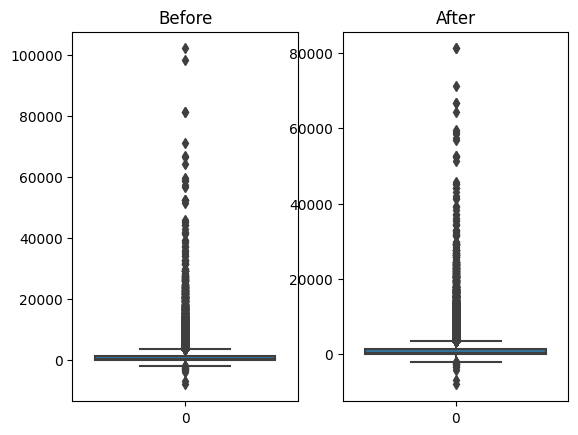

In [ ]:
fig, axes = plt.subplots(1,2)

print("Before Shape:", X.shape)
X_df =X[X['balance']<90000]
print("After Shape:", X_df.shape)

sns.boxplot(X['balance'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(X_df['balance'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

X=X_df;
X=X.reset_index(drop=True)

Now all the outliers are handled in numerical columns. 

In [ ]:
train_data = X

##**Dealing with categorical data**

Label encoding the data

categorical columns include these: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [ ]:
from sklearn.preprocessing import LabelEncoder # For converting categorical data into numerical

In [ ]:
encoder = LabelEncoder()
train_data['job'] = encoder.fit_transform(train_data['job']) # fit and transform the job column
job = {index : label for index, label in enumerate(encoder.classes_)} # create a dictionary of encodings
job

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed',
 11: 'unknown'}

In [ ]:
test_data['job'] = encoder.transform(test_data['job']) # transform the test data with the same encoder

In [ ]:
train_data['marital'] = encoder.fit_transform(train_data['marital']) #encoding for marital
marital = {index : label for index, label in enumerate(encoder.classes_)}
marital

{0: 'divorced', 1: 'married', 2: 'single'}

In [ ]:
test_data['marital'] = encoder.transform(test_data['marital']) # transform the test data with the same encoder

In [ ]:
train_data['education'] = encoder.fit_transform(train_data['education']) #encoding for education
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}

In [ ]:
test_data['education'] = encoder.transform(test_data['education']) # transform the test data with the same encoder

In [ ]:
train_data['housing'] = encoder.fit_transform(train_data['housing']) #encoding for education
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'no', 1: 'yes'}

In [ ]:
test_data['housing'] = encoder.transform(test_data['housing']) # transform the test data with the same encoder

In [ ]:
train_data['loan'] = encoder.fit_transform(train_data['loan']) #encoding for education
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'no', 1: 'yes'}

In [ ]:
test_data['loan'] = encoder.transform(test_data['loan']) # transform the test data with the same encoder

In [ ]:
train_data['contact'] = encoder.fit_transform(train_data['contact']) #encoding for education
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'cellular', 1: 'telephone', 2: 'unknown'}

In [ ]:
test_data['contact'] = encoder.transform(test_data['contact']) # transform the test data with the same encoder

In [ ]:
train_data['month'] = encoder.fit_transform(train_data['month']) #encoding for education
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'apr',
 1: 'aug',
 2: 'dec',
 3: 'feb',
 4: 'jan',
 5: 'jul',
 6: 'jun',
 7: 'mar',
 8: 'may',
 9: 'nov',
 10: 'oct',
 11: 'sep'}

In [ ]:
test_data['month'] = encoder.transform(test_data['month']) # transform the test data with the same encoder

In [ ]:
train_data['poutcome'] = encoder.fit_transform(train_data['poutcome']) #encoding for education
education = {index : label for index, label in enumerate(encoder.classes_)}
education

{0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}

In [ ]:
test_data['poutcome'] = encoder.transform(test_data['poutcome']) # transform the test data with the same encoder

In [ ]:
train_data

,id,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,98749,32,0,2,1,64,1,0,2,8,202,2,-1,0,3,0
1,19550,45,1,1,1,534,0,0,0,1,104,6,-1,0,3,0
2,75084,45,9,1,1,1477,1,0,0,9,75,1,132,1,0,0
3,65715,39,9,1,2,14,0,0,0,4,114,2,-1,0,3,0
4,41412,49,1,2,3,2222,0,0,2,6,114,2,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40677,24953,29,9,2,1,3313,1,0,2,6,18,3,-1,0,3,0
40678,34002,59,0,1,1,92,1,0,0,8,139,2,350,1,0,0
40679,76035,54,1,1,1,548,0,0,0,1,520,7,-1,0,3,1
40680,61279,46,1,1,0,258,1,0,2,8,217,1,-1,0,3,0


Hence, our data is label encoded now

## **Feature engineering**

In [ ]:
X2 = train_data.copy()
X_test_feature = test_data.copy()

In [ ]:
import scipy.stats as stats

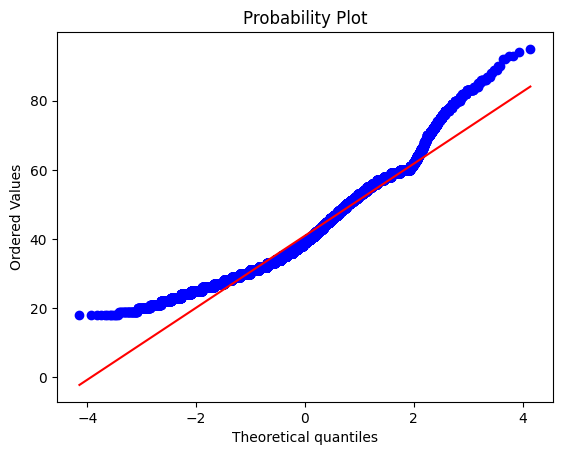

<Axes: >

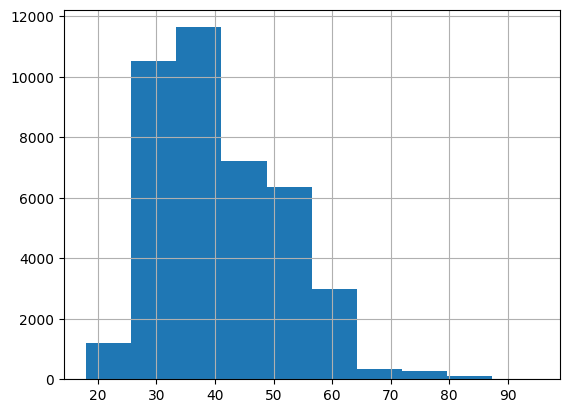

In [ ]:
#create and show the plot
stats.probplot(X2["age"], dist="norm", plot=plt)
plt.show()
X2["age"].hist()

It can be seen that the age is right skewed. It should be transformed using square root transformation to reduce the skewness.

<Axes: >

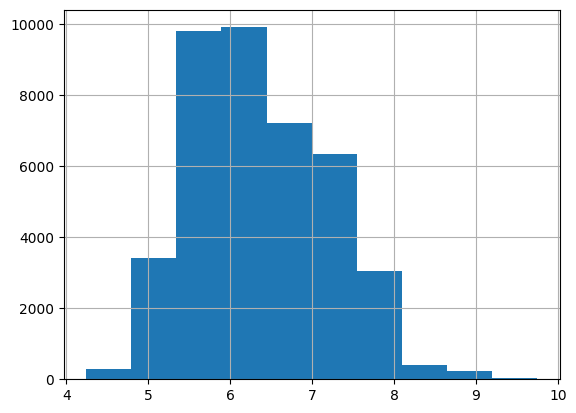

In [ ]:
from sklearn.preprocessing import FunctionTransformer

logarithm_transformer = FunctionTransformer(np.sqrt)
data_df = logarithm_transformer.transform(X2['age'])

X2['age']=data_df
test_df = logarithm_transformer.transform(X_test_feature['age'])
X_test_feature['age'] = test_df
X2['age'].hist()

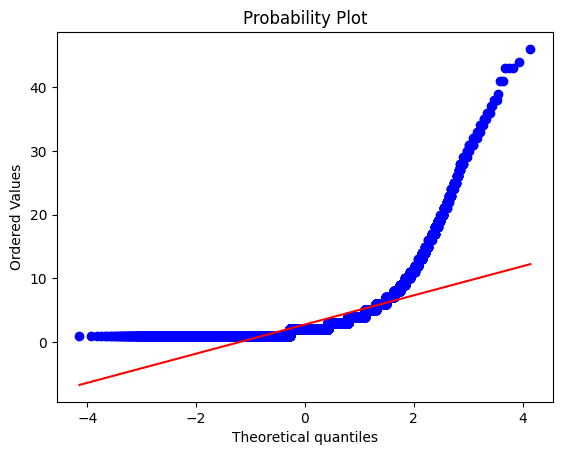

<Axes: >

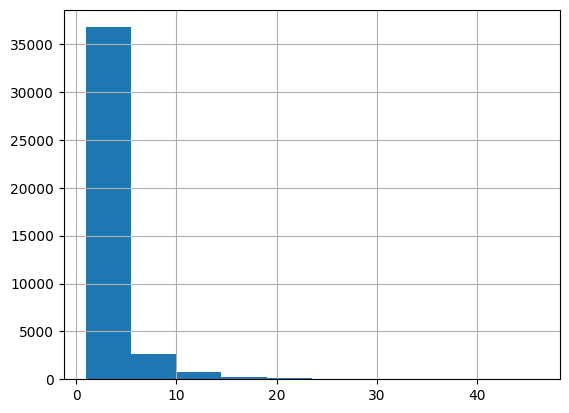

In [ ]:
stats.probplot(X2["campaign"], dist="norm", plot=plt)
plt.show()
X2["campaign"].hist()

campaign is right skewed. It should be transformed into normal distribution using square root transformer.

<Axes: >

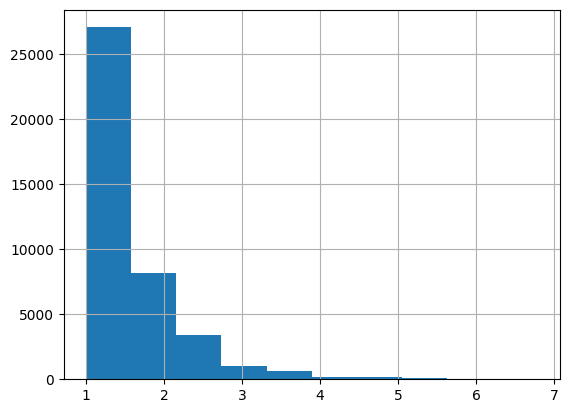

In [ ]:
logarithm_transformer = FunctionTransformer(np.sqrt)
data_df = logarithm_transformer.transform(X2['campaign'])
X2['campaign1']=data_df
test_df = logarithm_transformer.transform(X_test_feature['campaign'])
X_test_feature['campaign1'] = test_df
X2['campaign1'].hist()

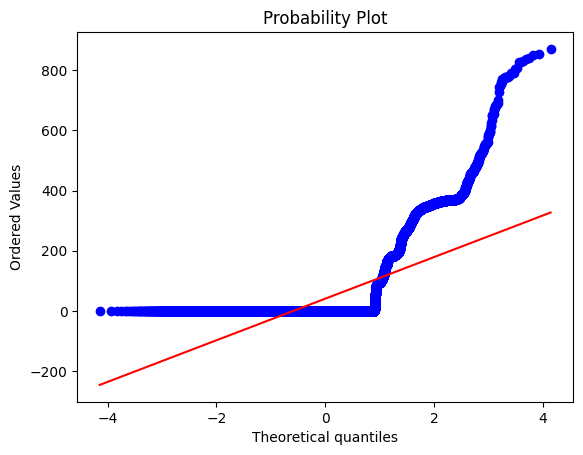

<Axes: >

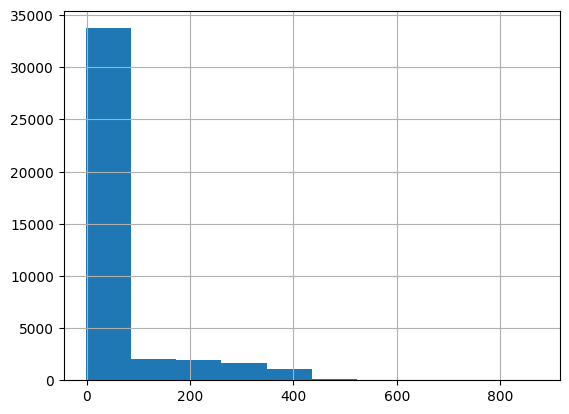

In [ ]:
stats.probplot(X2["pdays"], dist="norm", plot=plt)
plt.show()
X2["pdays"].hist()

Since, there are negative pdays as well we won't apply transformation over it

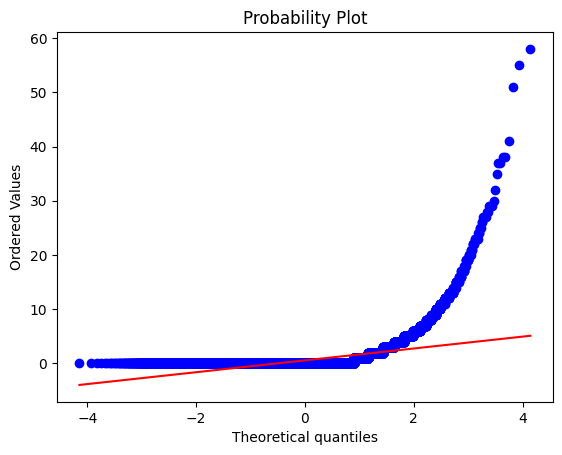

<Axes: >

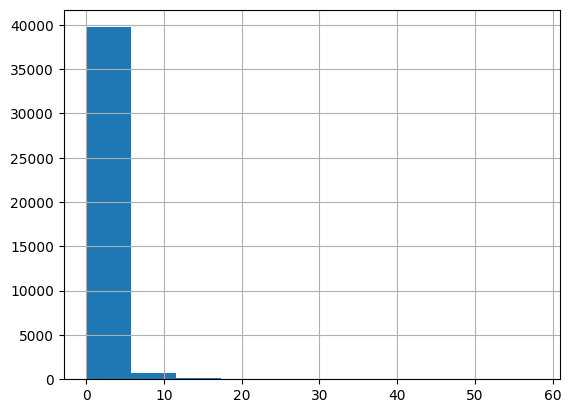

In [ ]:
stats.probplot(X2["previous"], dist="norm", plot=plt)
plt.show()
X2["previous"].hist()

previous is right skewed. Square root transformation should be applied.

<Axes: >

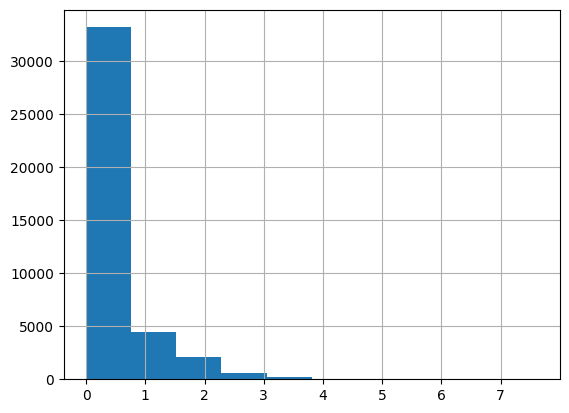

In [ ]:
logarithm_transformer = FunctionTransformer(np.sqrt)
data_df = logarithm_transformer.transform(X2['previous'])
X2['previous1']=data_df
test_df = logarithm_transformer.transform(X_test_feature['previous'])
X_test_feature['previous1'] = test_df
X2['previous1'].hist()

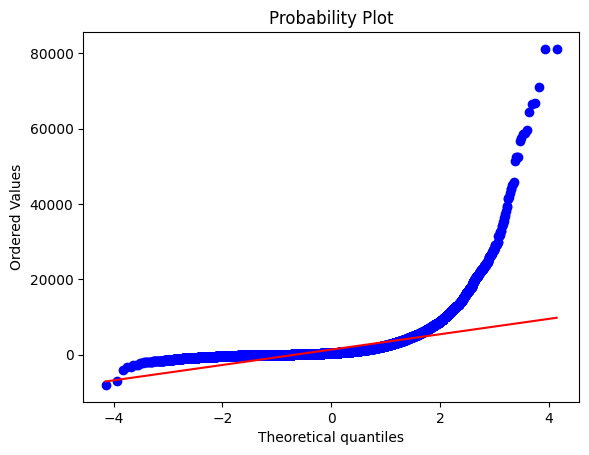

<Axes: >

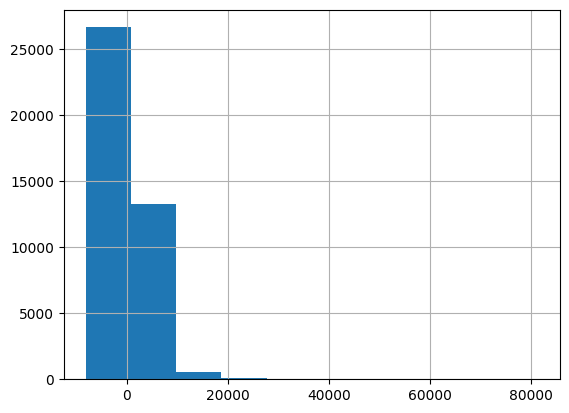

In [ ]:
stats.probplot(X2["balance"], dist="norm", plot=plt)
plt.show()
X2["balance"].hist()

Since, balance also takes negative values we can't apply logarithmic transformer over it

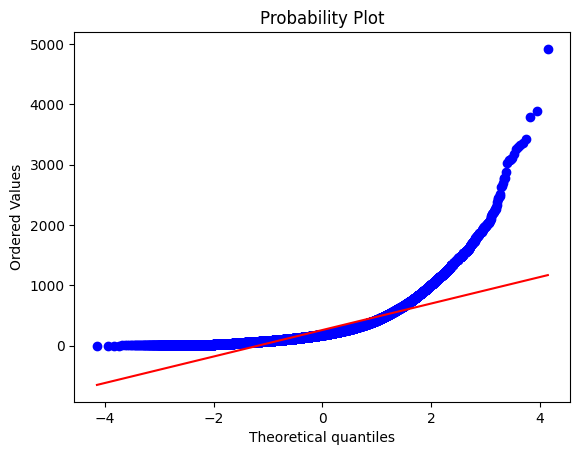

<Axes: >

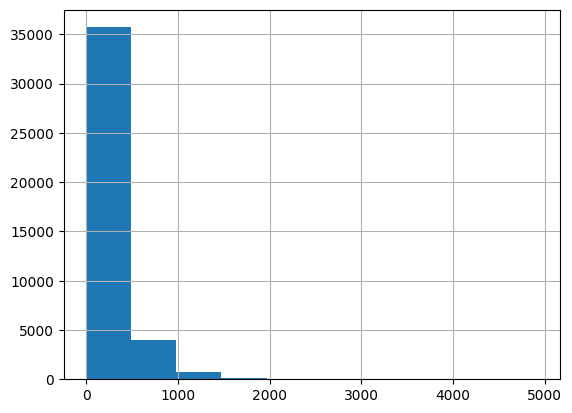

In [ ]:
stats.probplot(X2["duration"], dist="norm", plot=plt)
plt.show()
X2["duration"].hist()

<Axes: >

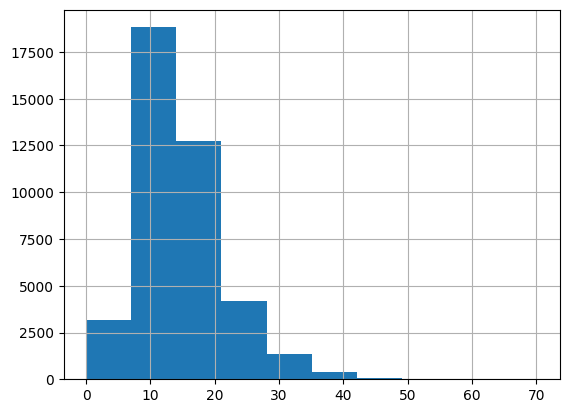

In [ ]:
logarithm_transformer = FunctionTransformer(np.sqrt)
data_df = logarithm_transformer.transform(X2['duration'])
X2['duration1']=data_df
test_df = logarithm_transformer.transform(X_test_feature['duration'])
X_test_feature['duration1'] = test_df
X2['duration1'].hist()

Since, this was not improving our test accuracy and instead decreasing we just keep this for vizualisation purposes

## **Standardization**

Standardization is applied only for numerical data. 

In [ ]:
X3 = X2.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

cols = X3[['age', 'campaign', 'pdays', 'previous', 'balance', 'duration']].copy() 
test_cols = test_data[['age', 'campaign', 'pdays', 'previous', 'balance', 'duration']].copy()
scaler = StandardScaler()
scaler.fit(cols)

scaled = scaler.transform(cols)
test_scaled = scaler.transform(test_cols)
scaled_df = pd.DataFrame(scaled, columns = cols.columns)
test_scaled_df = pd.DataFrame(test_scaled, columns = test_cols.columns)

In [ ]:
X3[['age', 'campaign', 'pdays', 'previous', 'balance', 'duration']] = scaled_df
test_data[['age', 'campaign', 'pdays', 'previous', 'balance', 'duration']] = test_scaled_df

##**Class imbalance problem**

In [ ]:
df2 = train_data.copy()

In [ ]:
#importing some models and useful functions for machine learning
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    fbeta_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [ ]:
x = df2.drop('y', axis = 1)
y = df2.loc[:, 'y']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
oversampling = SMOTE(random_state=1)
X_train_oversampling, y_train_oversampling = oversampling.fit_resample(X_train, y_train)

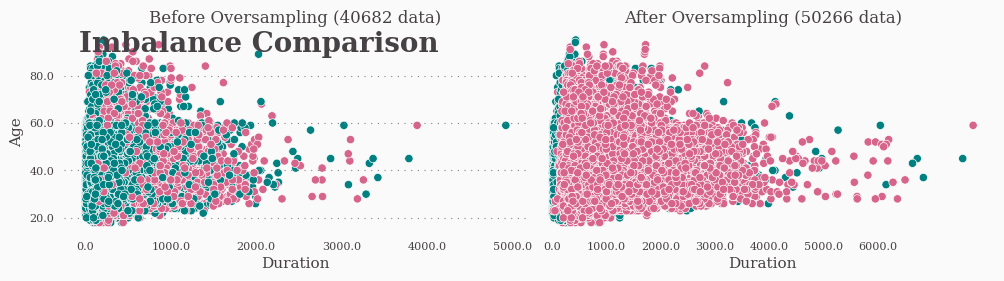

In [ ]:
# adding some colors
class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"


after_smote_df2 = pd.concat([X_train_oversampling, y_train_oversampling], axis=1)

fig = plt.figure(figsize=(12, 12), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4, 2, wspace=0.01)


for ax, col in enumerate(range(0, 2)):
    locals()["ax" + str(ax)] = fig.add_subplot(gs[0, col])
    locals()["ax" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["ax" + str(ax)].tick_params(axis="y", left=False)
    locals()["ax" + str(ax)].tick_params(axis="x", bottom=False, color=Colors.DarkGray)
    locals()["ax" + str(ax)].get_yaxis().set_visible(True)
    locals()["ax" + str(ax)].grid(
        which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5)
    )
    for s in ["top", "right", "left", "bottom"]:
        locals()["ax" + str(ax)].spines[s].set_visible(False)

color_palette = [Colors.Teal, Colors.HotPink]

sns.scatterplot(
    data=df2, x="duration", y="age", hue="y", ax=ax0, palette=color_palette
).set_title(
    f"Before Oversampling ({len(df2.y)} data)",
    fontsize=12,
    fontfamily="serif",
    color=Colors.DarkGray,
)
sns.scatterplot(
    data=after_smote_df2,
    x="duration",
    y="age",
    hue="y",
    ax=ax1,
    palette=color_palette,
).set_title(
    f"After Oversampling ({len(after_smote_df2.y)} data)",
    fontsize=12,
    fontfamily="serif",
    color=Colors.DarkGray,
)

for ax in range(2):
    locals()["ax" + str(ax)].get_legend().remove()
    locals()["ax" + str(ax)].set_xlabel(
        "Duration", fontfamily="serif", fontsize=11, color=Colors.DarkGray
    )
    locals()["ax" + str(ax)].set_ylabel(
        "Age", fontfamily="serif", fontsize=11, color=Colors.DarkGray
    )
    locals()["ax" + str(ax)].set_xticklabels(
        labels=ax0.get_xticks().tolist(),
        fontfamily="serif",
        fontsize=8,
        color=Colors.DarkGray,
    )
    locals()["ax" + str(ax)].set_yticklabels(
        labels=ax0.get_yticks().tolist(),
        fontfamily="serif",
        fontsize=8,
        color=Colors.DarkGray,
    )

ax1.get_yaxis().set_visible(False)

ax0.text(
    -75,
    90,
    "Imbalance Comparison",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)

fig.show()


##**Without train test split**

We now try without train test splitting the data. Of course this is a bad practice and it is not adviced to do such a thing as it might lead to over fitting. But over here we find that without doing the train test split we are able to better use the full dataset hence, we try to get the results without splitting. We will do it just to get a baseline estimate

####Using the light gbm model

In [ ]:
oversampling = SMOTE(random_state=1)
X_train_oversampling, y_train_oversampling = oversampling.fit_resample(x, y)

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth=9, n_estimators=260,objective='binary')

In [ ]:
clf = clf.fit(X_train_oversampling, y_train_oversampling)

Making predictions

In [ ]:
xtest = test_data.copy()
xtest = xtest.drop(['id'],axis=1)
X_test = (xtest)

In [ ]:
predictions_test = clf.predict(X_test)

In [ ]:
test_output= test_data['id']
test_output

0       5149
1       6179
2       4846
3       3676
4       4256
        ... 
4517    7880
4518    2635
4519    7780
4520    5259
4521    4973
Name: id, Length: 4522, dtype: int64

In [ ]:
predictions_test.shape

(4522,)

In [ ]:
df = pd.concat([test_output, pd.DataFrame({'y': predictions_test})], axis=1)

In [ ]:
df.to_csv('test1.csv', index=False)

In [ ]:
!kaggle competitions submit -c ee5180-course-contest -f test1.csv -m "test1"

100% 30.5k/30.5k [00:01<00:00, 16.8kB/s]
Successfully submitted to EE5180 Course Contest

####Using the light gbm model 2

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()

Fine tuning the model with grid search

In [ ]:
parameters = {
    "max_depth": range(2, 10, 1),
    "n_estimators": range(1, 1000, 100),
    "learning_rate": [0.1, 0.01, 0.05],
}
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
    scoring="roc_auc",
    n_jobs=5,
    cv=5,
    verbose=True,
)
grid_search.fit(X_train_oversampling, y_train_oversampling)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [ ]:
grid_search.best_estimator_

Predicting using the model


In [ ]:
xtest = test_data.copy()
xtest = xtest.drop(['id'],axis=1)
X_test = (xtest)

In [ ]:
predictions_test = grid_search.best_estimator_.predict(X_test)

In [ ]:
test_output= test_data['id']
test_output

0       5149
1       6179
2       4846
3       3676
4       4256
        ... 
4517    7880
4518    2635
4519    7780
4520    5259
4521    4973
Name: id, Length: 4522, dtype: int64

In [ ]:
predictions_test.shape

(4522,)

In [ ]:
df = pd.concat([test_output, pd.DataFrame({'y': predictions_test})], axis=1)

In [ ]:
df.to_csv('test1.csv', index=False)

In [ ]:
!kaggle competitions submit -c ee5180-course-contest -f test1.csv -m "test1"

100% 30.5k/30.5k [00:03<00:00, 10.1kB/s]
Successfully submitted to EE5180 Course Contest

####Xgboost model1

the parameters have been obtained by grid_search

In [ ]:
xgb = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None)

In [ ]:
xg_model = xgb.fit(x,y)

making predictions

In [ ]:
xtest = test_data.drop('id',axis=1)
X_test = (xtest)

In [ ]:
predictions_test = xgb.predict(X_test)

In [ ]:
test_output= test_data['id']
test_output

0       5149
1       6179
2       4846
3       3676
4       4256
        ... 
4517    7880
4518    2635
4519    7780
4520    5259
4521    4973
Name: id, Length: 4522, dtype: int64

In [ ]:
predictions_test.shape

(4522,)

In [ ]:
df = pd.concat([test_output, pd.DataFrame({'y': predictions_test})], axis=1)

In [ ]:
df.to_csv('test1.csv', index=False)

In [ ]:
!kaggle competitions submit -c ee5180-course-contest -f test1.csv -m "test1"

100% 30.5k/30.5k [00:02<00:00, 12.1kB/s]
Successfully submitted to EE5180 Course Contest

####Xgboost model 2

In [ ]:
xgb = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None)

In [ ]:
xg_model = xgb.fit(x,y)

In [ ]:
xtest = test_data.drop('id',axis=1)
X_test = (xtest)

In [ ]:
predictions_test = xgb.predict(X_test)

In [ ]:
test_output= test_data['id']
test_output

0       5149
1       6179
2       4846
3       3676
4       4256
        ... 
4517    7880
4518    2635
4519    7780
4520    5259
4521    4973
Name: id, Length: 4522, dtype: int64

In [ ]:
predictions_test.shape

(4522,)

In [ ]:
df = pd.concat([test_output, pd.DataFrame({'y': predictions_test})], axis=1)

In [ ]:
df.to_csv('test1.csv', index=False)

In [ ]:
!kaggle competitions submit -c ee5180-course-contest -f test1.csv -m "test1"

100% 30.5k/30.5k [00:02<00:00, 11.9kB/s]
Successfully submitted to EE5180 Course Contest

####Xgboost model 3

In [ ]:
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=0,
    objective='binary:logistic',
    booster='gbtree',
    tree_method='hist',
    gamma=0.1,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    random_state=42
)

In [ ]:
xg_model = xgb.fit(x,y)

In [ ]:
xtest = test_data.drop('id',axis=1)
X_test = (xtest)

In [ ]:
predictions_test = xgb.predict(X_test)

In [ ]:
test_output= test_data['id']
test_output

In [ ]:
df = pd.concat([test_output, pd.DataFrame({'y': predictions_test})], axis=1)

In [ ]:
df.to_csv('test1.csv', index=False)

In [ ]:
!kaggle competitions submit -c ee5180-course-contest -f test1.csv -m "test1"

##**Developing machine learning models**

The purpose of splitting the data into training and testing sets is to evaluate the performance of the model on new, unseen data. If the model is trained on the same data it is tested on, it will most likely overfit, meaning it will perform very well on the training data, but poorly on new data.

Using a train-test split ensures that the model is evaluated on new, unseen data, which is a more accurate representation of how the model will perform in the real world. It also allows us to tune the model parameters and improve its performance on the test data.

Therefore, it is always recommended to use a train-test split when building a machine learning model.

Hence, we split the data form the model and then evaluate it and then submit the predictions.

Also, we use grid search for optimising the parameters

### Light gbm

Using the light gbm model for the prediction over the data

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [ ]:
parameters = {
    "max_depth": range(2, 10, 1),
    "n_estimators": range(60, 300, 50),
    "learning_rate": [0.1, 0.01, 0.05],
}
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
    scoring="roc_auc",
    n_jobs=5,
    cv=5,
    verbose=True,
)
grid_search.fit(X_train_oversampling, y_train_oversampling)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 300, 50)},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

LGBMClassifier(max_depth=9, n_estimators=260)

Predicting the output

In [ ]:
xtest = test_data.copy()
xtest = xtest.drop(['id'],axis=1)
X_test = (xtest)

In [ ]:
predictions_test = grid_search.best_estimator_.predict(X_test)

In [ ]:
test_output= test_data['id']
test_output

0       5149
1       6179
2       4846
3       3676
4       4256
        ... 
4517    7880
4518    2635
4519    7780
4520    5259
4521    4973
Name: id, Length: 4522, dtype: int64

In [ ]:
predictions_test.shape

(4522,)

In [ ]:
df = pd.concat([test_output, pd.DataFrame({'y': predictions_test})], axis=1)

In [ ]:
df.to_csv('test1.csv', index=False)

Submitting the predictions

In [ ]:
!kaggle competitions submit -c ee5180-course-contest -f test1.csv -m "test1"

100% 30.5k/30.5k [00:03<00:00, 10.1kB/s]
Successfully submitted to EE5180 Course Contest

### Xgboost classifier

Using the Xgboost classifier for fitting and then predicting the output

In [ ]:
estimator = XGBClassifier(objective="binary:logistic", nthread=4, seed=42)
parameters = {
    "max_depth": range(2, 10, 1),
    "n_estimators": range(60, 300, 50),
    "learning_rate": [0.1, 0.01, 0.05],
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring="roc_auc",
    n_jobs=5,
    cv=5,
    verbose=True,
)

grid_search.fit(X_train_oversampling, y_train_oversampling)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [ ]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
xgb_pred = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, xgb_pred))
print("Accuracy Score: ", accuracy_score(y_test, xgb_pred))
print(f"F1 Score: {f1_score(y_test,xgb_pred)}")

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10782
           1       0.60      0.50      0.55      1425

    accuracy                           0.90     12207
   macro avg       0.77      0.73      0.75     12207
weighted avg       0.90      0.90      0.90     12207

Accuracy Score:  0.9030883919062833
F1 Score: 0.5451749327181853


Checking for another xgboost classifier

Writing the above xgboost classifier in a new cell so that there is not a need to run grid search again and again

In [ ]:
xgb = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=180, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None)

In [ ]:
xg_model = xgb.fit(X_train_oversampling, y_train_oversampling)

In [ ]:
xgb_pred = xg_model.predict(X_test)

print(classification_report(y_test, xgb_pred))
print("Accuracy Score: ", accuracy_score(y_test, xgb_pred))
print(f"F1 Score: {f1_score(y_test,xgb_pred)}")

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10789
           1       0.50      0.65      0.56      1416

    accuracy                           0.88     12205
   macro avg       0.73      0.78      0.75     12205
weighted avg       0.90      0.88      0.89     12205

Accuracy Score:  0.8840639082343302
F1 Score: 0.5639445300462249


Printing the scores for xgboost model used

In [ ]:
xtest = test_data.drop('id',axis=1)
# X_test = pd.get_dummies(xtest)

In [ ]:
predictions_test = xg_model.predict(X_test)

In [ ]:
test_output= test_data['id']
test_output

0       5149
1       6179
2       4846
3       3676
4       4256
        ... 
4517    7880
4518    2635
4519    7780
4520    5259
4521    4973
Name: id, Length: 4522, dtype: int64

In [ ]:
predictions_test.shape

(4522,)

In [ ]:
df = pd.concat([test_output, pd.DataFrame({'y': predictions_test})], axis=1)

In [ ]:
df.to_csv('test1.csv', index=False)

In [ ]:
!kaggle competitions submit -c ee5180-course-contest -f test1.csv -m "test1"

100% 30.5k/30.5k [00:02<00:00, 12.6kB/s]
Successfully submitted to EE5180 Course Contest

### Logistic Regression

In [ ]:
logreg_params = {"penalty": ["l1", "l2"], "C": [0.001, 0.01, 0.1, 1, 10, 100]}
gcv_logreg = GridSearchCV(
    LogisticRegression(random_state=1), param_grid=logreg_params, cv=10, scoring="f1"
)
logreg_gcv = gcv_logreg.fit(X_train_oversampling, y_train_oversampling)
print(f"Best Parameter: {logreg_gcv.best_params_}")
print(f"Best Score: {logreg_gcv.best_score_}")

Best Parameter: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.7681301449843534


In [ ]:
logreg_pred = logreg_gcv.best_estimator_.predict(X_test)

print(classification_report(y_test, logreg_pred))
print("Accuracy Score: ", accuracy_score(y_test, logreg_pred))
print(f"F1 Score: {f1_score(y_test,logreg_pred)}")

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     10789
           1       0.30      0.67      0.42      1416

    accuracy                           0.78     12205
   macro avg       0.63      0.73      0.64     12205
weighted avg       0.87      0.78      0.82     12205

Accuracy Score:  0.7844326095862352
F1 Score: 0.41882041086812455


### Naive Bayes

In [ ]:
nb_params = {"var_smoothing": np.logspace(0, -9, num=100)}
gcv_nb = GridSearchCV(GaussianNB(), param_grid=nb_params, cv=10, scoring="f1")

nb_gcv = gcv_nb.fit(X_train_oversampling, y_train_oversampling)
print(f"Best Parameter: {nb_gcv.best_params_}")
print(f"Best Score: {nb_gcv.best_score_}")

Best Parameter: {'var_smoothing': 1e-09}
Best Score: 0.8232902537673011


In [ ]:
nb_pred = nb_gcv.best_estimator_.predict(X_test)

print(classification_report(y_test, nb_pred))
print("Accuracy Score: ", accuracy_score(y_test, nb_pred))
print(f"F1 Score: {f1_score(y_test,nb_pred)}\n")

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     10789
           1       0.26      0.80      0.39      1416

    accuracy                           0.72     12205
   macro avg       0.61      0.75      0.60     12205
weighted avg       0.88      0.72      0.76     12205

Accuracy Score:  0.7150348217943466
F1 Score: 0.3930191972076789



### Decision Tree

In [ ]:
dt_params = {"criterion": ["gini", "entropy"], "max_depth": np.arange(3, 15)}
gcv_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=1), param_grid=dt_params, cv=10, scoring="f1"
)

dt_gcv = gcv_dt.fit(X_train_oversampling, y_train_oversampling)
print(f"Best Parameter: {dt_gcv.best_params_}")
print(f"Best Score: {dt_gcv.best_score_}")

Best Parameter: {'criterion': 'gini', 'max_depth': 11}
Best Score: 0.8934599688470757


In [ ]:
dt_pred = dt_gcv.best_estimator_.predict(X_test)
print(classification_report(y_test, dt_pred))
print('Accuracy Score: ',accuracy_score(y_test,dt_pred))
print(f'F1 Score: {f1_score(y_test,dt_pred)}\n')

              precision    recall  f1-score   support

           0       0.96      0.88      0.91     10789
           1       0.42      0.69      0.52      1416

    accuracy                           0.85     12205
   macro avg       0.69      0.78      0.72     12205
weighted avg       0.89      0.85      0.87     12205

Accuracy Score:  0.8548136009832036
F1 Score: 0.5249329758713136



In [ ]:
import matplotlib

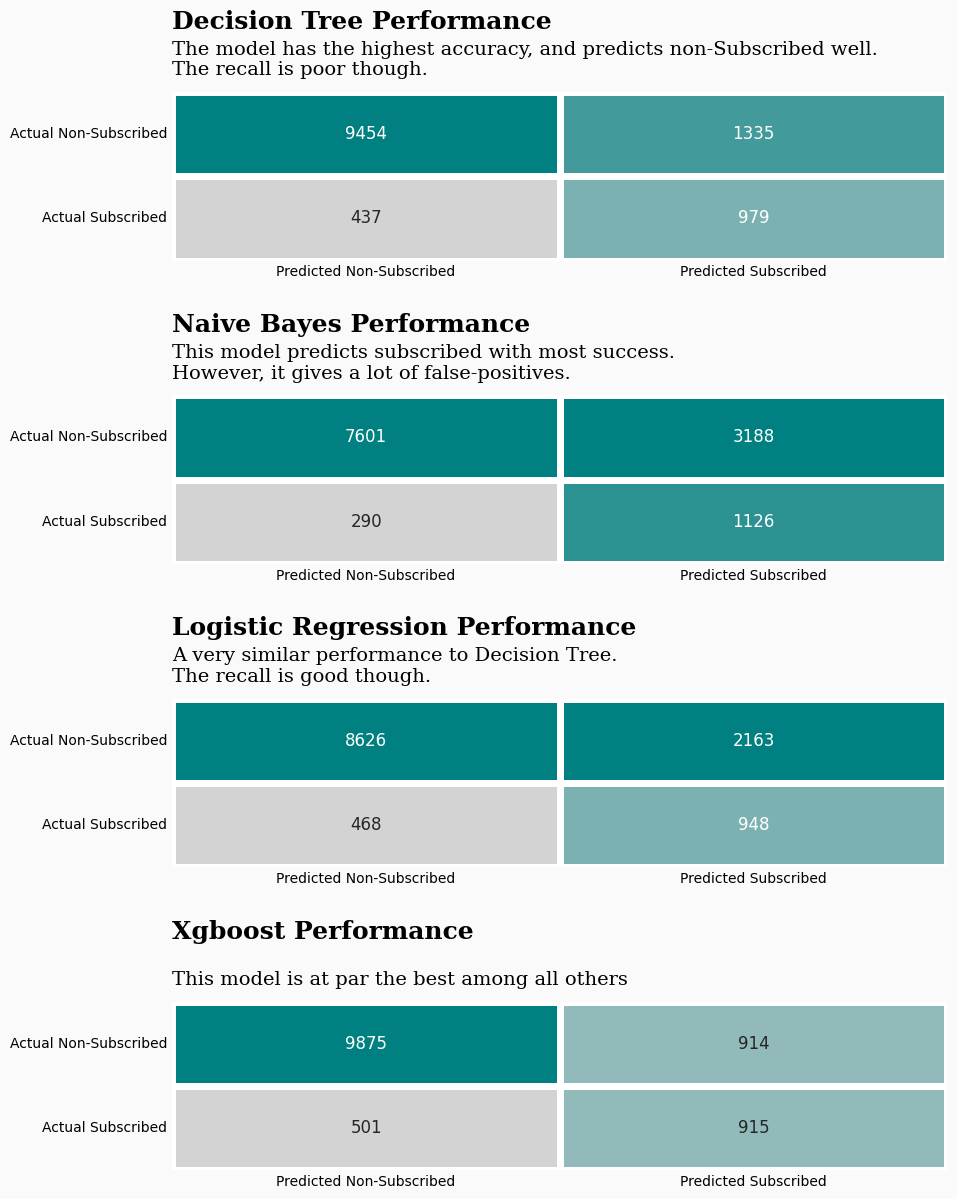

In [ ]:
colors = [
    "lightgray",
    Colors.Teal,
    Colors.Teal,
    Colors.Teal,
    Colors.Teal,
    Colors.Teal,
    Colors.Teal,
    Colors.Teal,
]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(10, 14), facecolor=Colors.LightGray)  # create figure
gs = fig.add_gridspec(4, 2, wspace=0.1, hspace=0.8)

for ax in range(4):
    locals()["ax" + str(ax)] = fig.add_subplot(gs[ax, :])
    locals()["ax" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["ax" + str(ax)].tick_params(axis="both", which="both", length=0)
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(
    dt_cm,
    cmap=colormap,
    annot=True,
    fmt="d",
    linewidths=5,
    cbar=False,
    ax=ax0,
    yticklabels=["Actual Non-Subscribed", "Actual Subscribed"],
    xticklabels=["Predicted Non-Subscribed", "Predicted Subscribed"],
    annot_kws={"fontsize": 12},
)
nb_cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(
    nb_cm,
    cmap=colormap,
    annot=True,
    fmt="d",
    linewidths=5,
    cbar=False,
    ax=ax1,
    yticklabels=["Actual Non-Subscribed", "Actual Subscribed"],
    xticklabels=["Predicted Non-Subscribed", "Predicted Subscribed"],
    annot_kws={"fontsize": 12},
)
logreg_cm = confusion_matrix(y_test, logreg_pred)
sns.heatmap(
    logreg_cm,
    cmap=colormap,
    annot=True,
    fmt="d",
    linewidths=5,
    cbar=False,
    ax=ax2,
    yticklabels=["Actual Non-Subscribed", "Actual Subscribed"],
    xticklabels=["Predicted Non-Subscribed", "Predicted Subscribed"],
    annot_kws={"fontsize": 12},
)
xg_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(
    xg_cm,
    cmap=colormap,
    annot=True,
    fmt="d",
    linewidths=5,
    cbar=False,
    ax=ax3,
    yticklabels=["Actual Non-Subscribed", "Actual Subscribed"],
    xticklabels=["Predicted Non-Subscribed", "Predicted Subscribed"],
    annot_kws={"fontsize": 12},
)
ax0.text(
    0,
    -0.75,
    "Decision Tree Performance",
    fontsize=18,
    fontweight="bold",
    fontfamily="serif",
)
ax0.text(
    0,
    -0.2,
    "The model has the highest accuracy, and predicts non-Subscribed well.\nThe recall is poor though.",
    fontsize=14,
    fontfamily="serif",
)
ax1.text(
    0,
    -0.75,
    "Naive Bayes Performance",
    fontsize=18,
    fontweight="bold",
    fontfamily="serif",
)
ax1.text(
    0,
    -0.2,
    "This model predicts subscribed with most success.\nHowever, it gives a lot of false-positives.",
    fontsize=14,
    fontfamily="serif",
)
ax2.text(
    0,
    -0.75,
    "Logistic Regression Performance",
    fontsize=18,
    fontweight="bold",
    fontfamily="serif",
)
ax2.text(
    0,
    -0.2,
    "A very similar performance to Decision Tree.\nThe recall is good though.",
    fontsize=14,
    fontfamily="serif",
)
ax3.text(
    0,
    -0.75,
    "Xgboost Performance",
    fontsize=18,
    fontweight="bold",
    fontfamily="serif",
)
ax3.text(
    0,
    -0.2,
    "This model is at par the best among all others",
    fontsize=14,
    fontfamily="serif",
)

fig.show()


In [ ]:
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()
    accuracy = (tp + tn) / (tn + tp + fn + fp)
    sensitivity = tp / (fn + tp)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1 = 2 * (1 / ((1 / precision) + (1 / sensitivity)))
    metrics = pd.DataFrame(
        data=[f1, accuracy, sensitivity, specificity, precision],
        columns=[title],
        index=["F1", "Accuracy", "Recall", "Specificity", "Precision"],
    )
    return metrics


logreg_df = dataframe_to_plot("Tuned Logistic Regression Score", logreg_cm)
navbayes_df = dataframe_to_plot("Tuned Naive Bayes Score", nb_cm)
dectree_df = dataframe_to_plot("Tuned Decision Tree Score", dt_cm)
xg_df = dataframe_to_plot("Tuned Xgboost Score", xg_cm)

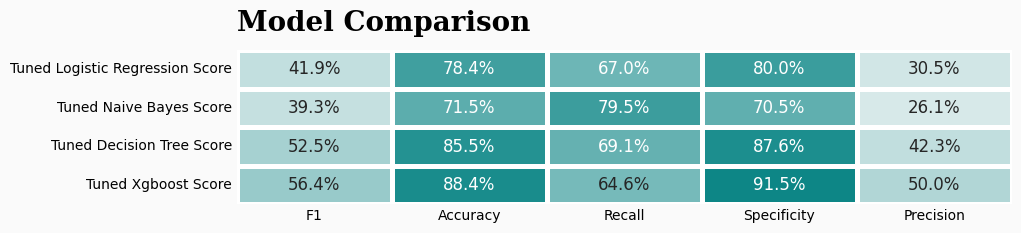

In [ ]:
df_models = round(pd.concat([logreg_df, navbayes_df, dectree_df,xg_df], axis=1), 4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig = plt.figure(figsize=(10, 8), dpi=100, facecolor=Colors.LightGray)  # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0:1, :])

sns.heatmap(
    df_models.T,
    cmap=colormap,
    annot=True,
    fmt=".1%",
    vmin=0,
    vmax=0.95,
    linewidths=2.5,
    cbar=False,
    ax=ax0,
    annot_kws={"fontsize": 12},
)
fig.patch.set_facecolor(Colors.LightGray)
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.text(
    0, -0.5, "Model Comparison", fontsize=20, fontweight="bold", fontfamily="serif"
)

fig.show()

Hence, we see that Xgboost is the best model overall and hence, we use it for prediction. And on testing with the test dataset we recieve a 76% accuracy.

##**Learnings**

Here are some potential learnings that can be derived from this analysis:

1.   Exploratory data analysis can help identify patterns and trends in the data that can inform the development of effective marketing strategies.
2. Feature engineering, or the creation of new variables based on existing ones, can improve the predictive power of machine learning models.
3. Data cleaning and preprocessing is an essential step in ensuring the accuracy and validity of the results obtained from data analysis.
4. It is important to carefully choose and evaluate machine learning algorithms based on their performance metrics and the specific problem being addressed.
5. The time of year can have a significant impact on the success of marketing campaigns, as seen in the higher subscription rates during certain months in this dataset.
6. Regular monitoring and analysis of marketing campaigns can help identify areas for improvement and inform future decision-making.
7. Visualizations can be an effective tool for communicating insights and trends in the data to stakeholders.

Trying various machine learning models is important because different models have different strengths and weaknesses. Some models may perform well on certain types of data or certain types of problems, while others may not. By trying different models, we can identify the one that works best for our particular problem and data. Additionally, trying different models can help us gain a better understanding of our data and the problem we are trying to solve, as each model may reveal different insights and patterns in the data. It is also important to keep in mind that no single model is perfect, and by trying different models and comparing their performance, we can get a more accurate assessment of the predictive power of our data.

###**THANK           YOU**